In [10]:
import profiles as prof
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.signal import argrelextrema
import statistics 
from scipy.optimize import curve_fit

In [2]:
origin_A = [632.353, 377.38] # pixels
origin_B = [607.779,377.38] # pixels

# Origin in A

In [3]:
file_base = 'profiles/OriginA-orig_imag'
ang_step = 5
ang = np.arange(0,360,ang_step)
file_nameA = [file_base+'_'+str(a)+'deg.dat' for a in ang]
profileA = [np.loadtxt(file) for file in file_nameA]
distA =  [i[:,0] for i in profileA]
valueA = np.multiply([i[:,1] for i in profileA],distA) 

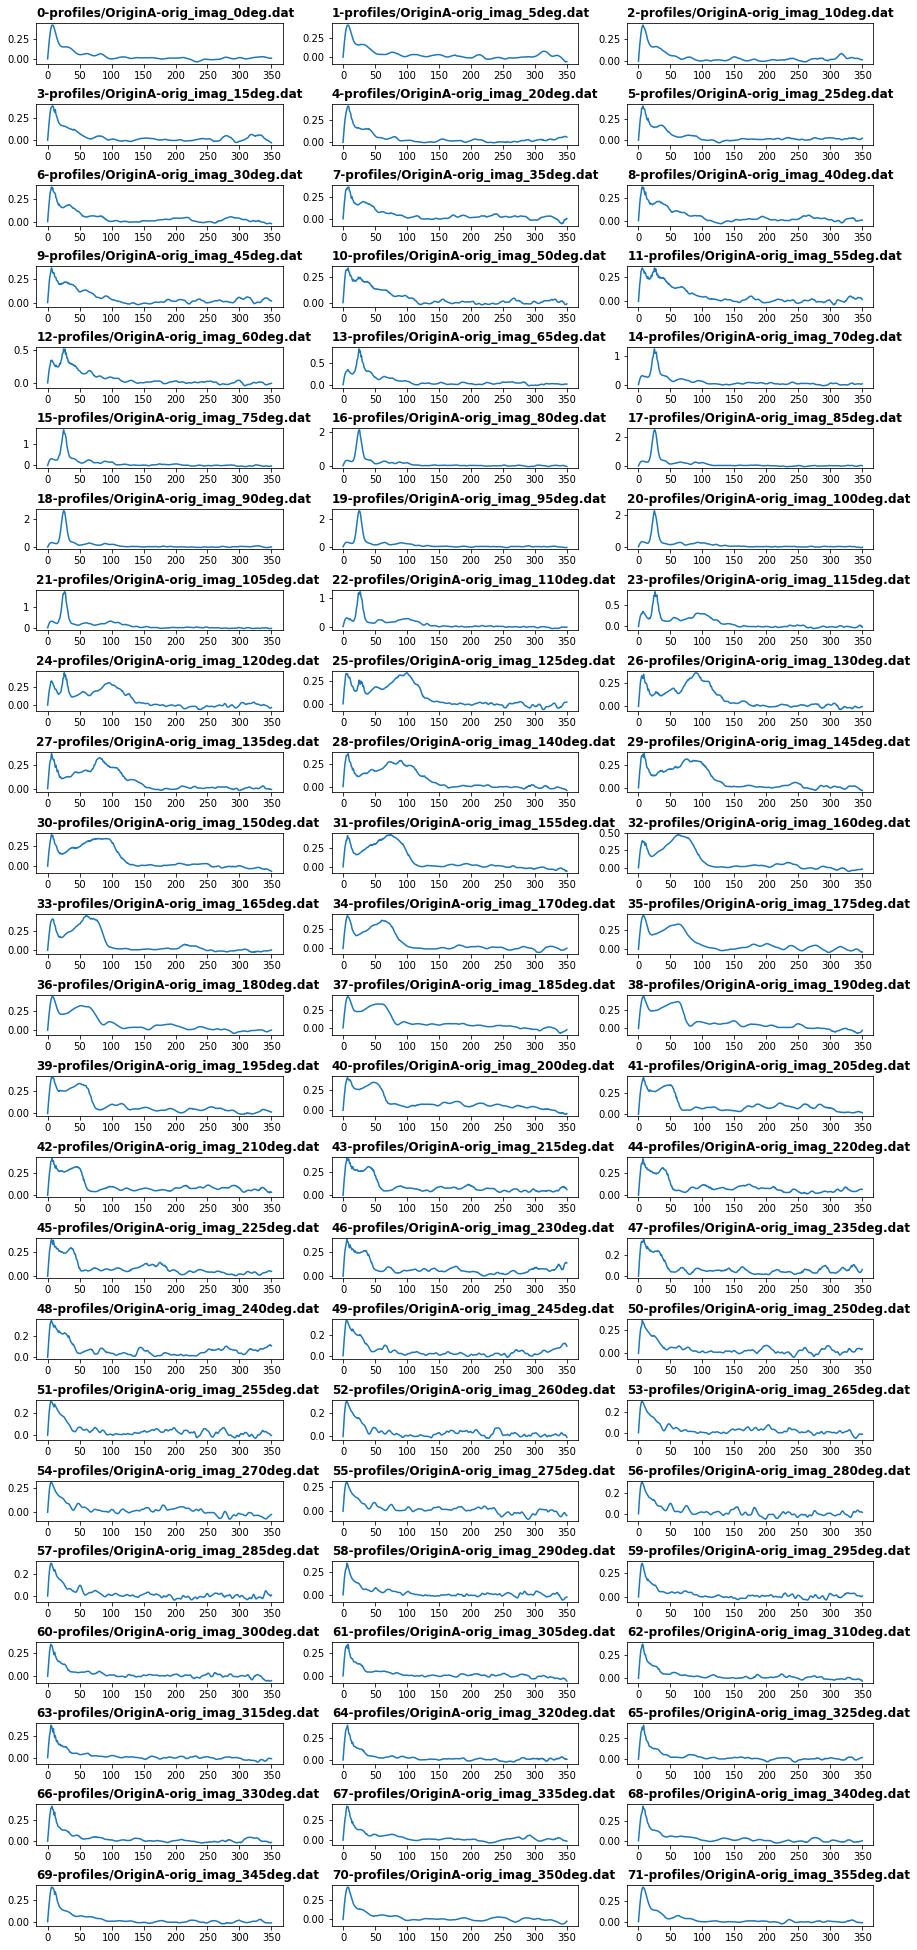

In [4]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_nameA)):
    # Find the right spot on the plot
    plt.subplot(math.ceil(len(file_nameA)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(distA[num], valueA[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_nameA[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

In [181]:
cut = 1
maxsA = []
rmsA = statistics.stdev(valueA[18][150:-1])
for i in valueA: 
    all_local_maxA = argrelextrema(i, np.greater,order=3)[0]
    true_local_maxA = np.where(i[all_local_maxA]>cut*rmsA)
    maxsA.append(all_local_maxA[true_local_maxA])
file_name_maxsA = 'profiles/maxsA-'+str(cut)+'sigma.dat'
prof.write_maxs(file_name_maxsA,maxsA)

In [5]:
file_name_maxsA = 'profiles/maxsA-1sigma.dat'
maxsA = prof.load_maxs(file_name_maxsA)

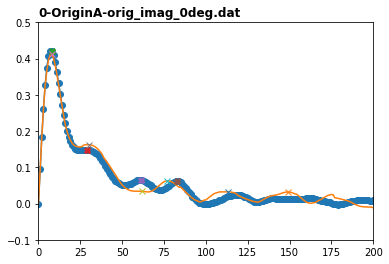

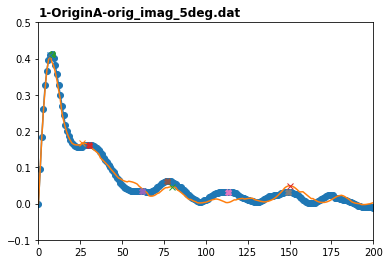

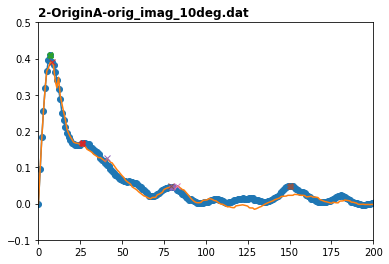

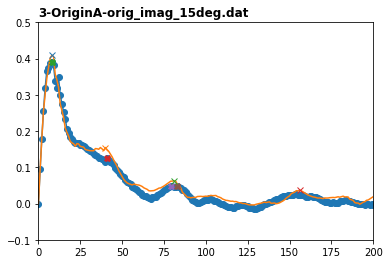

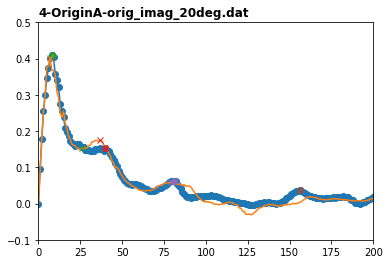

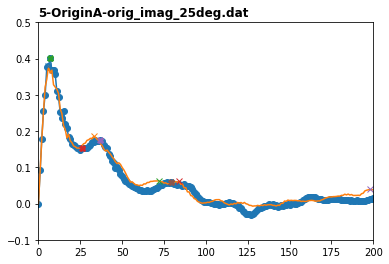

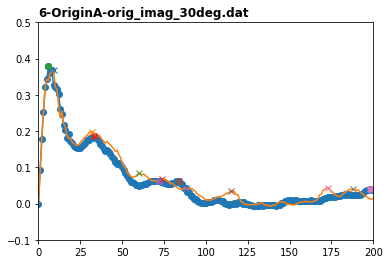

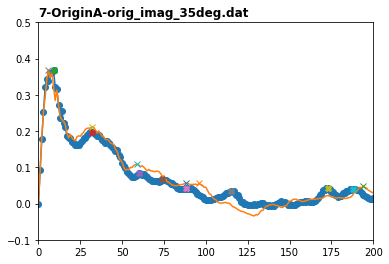

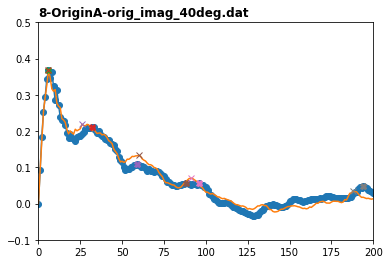

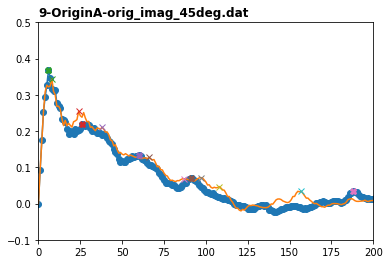

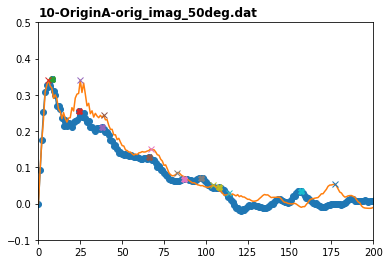

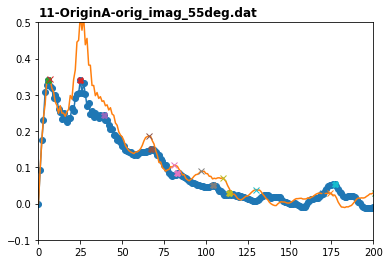

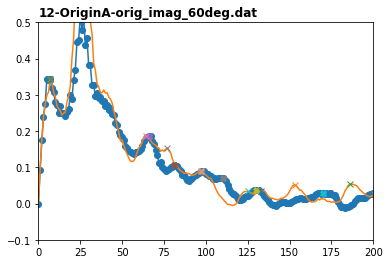

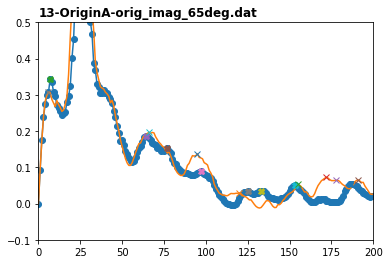

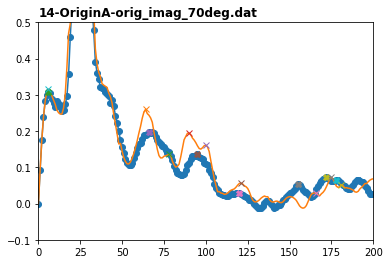

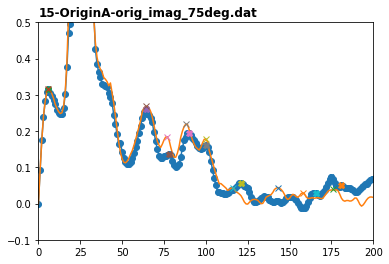

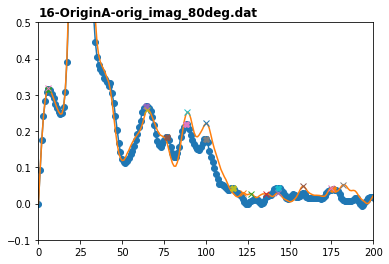

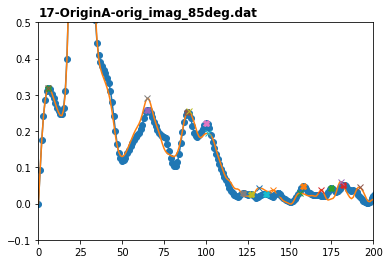

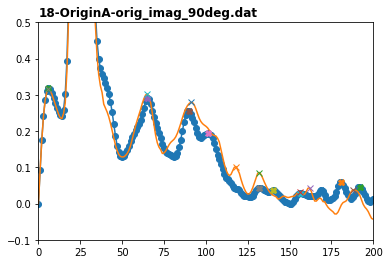

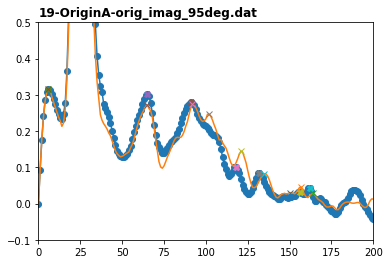

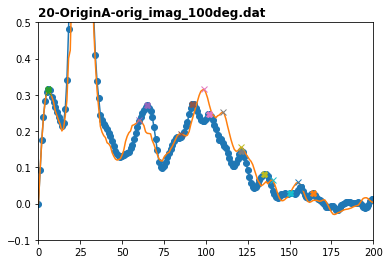

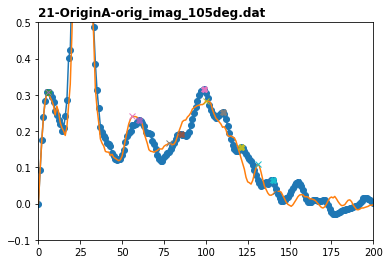

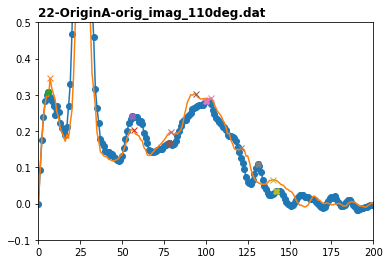

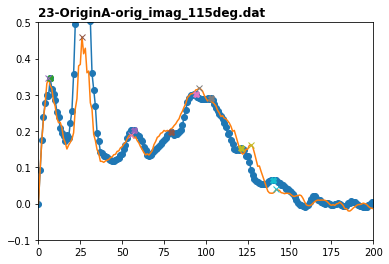

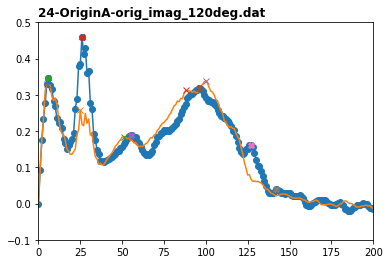

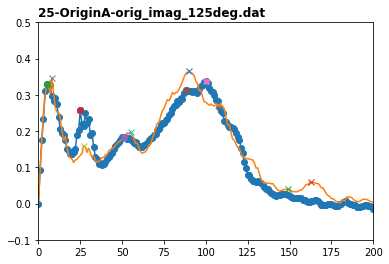

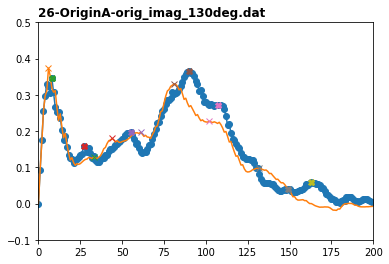

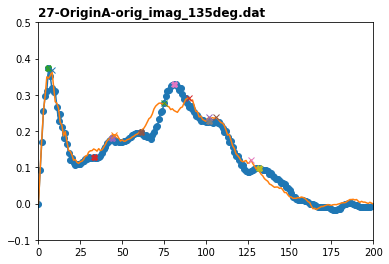

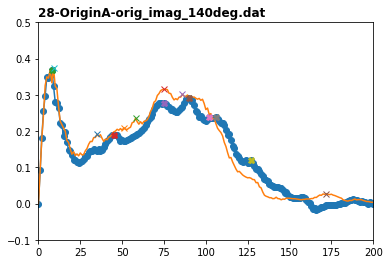

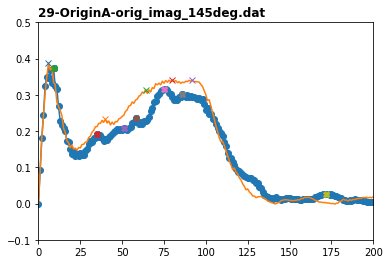

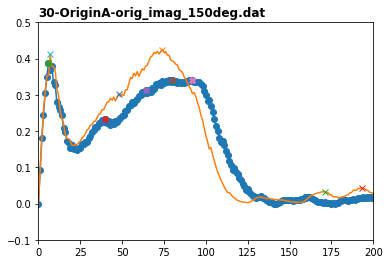

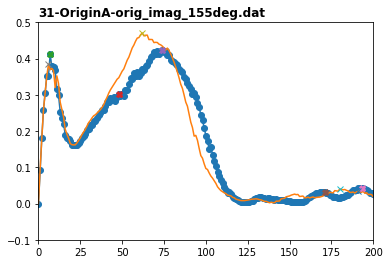

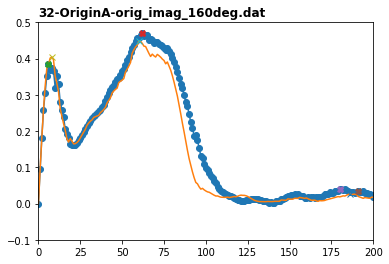

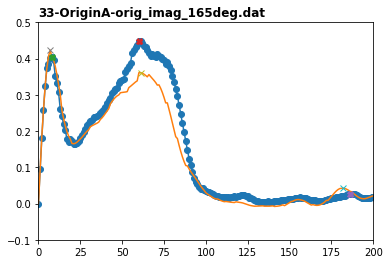

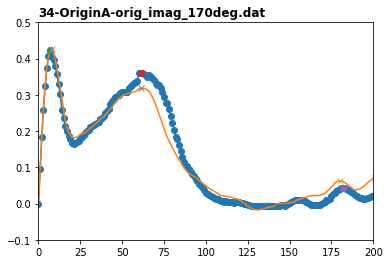

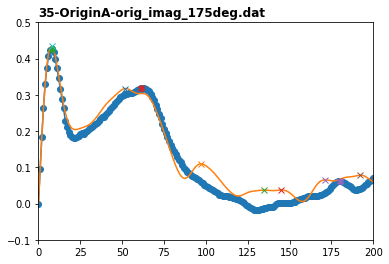

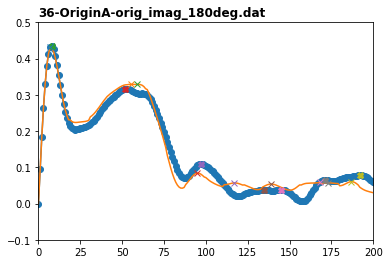

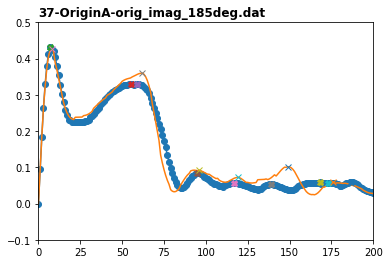

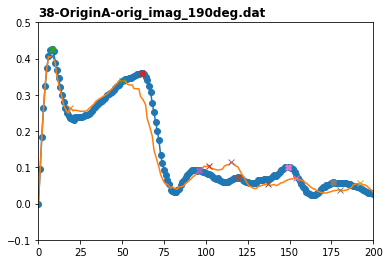

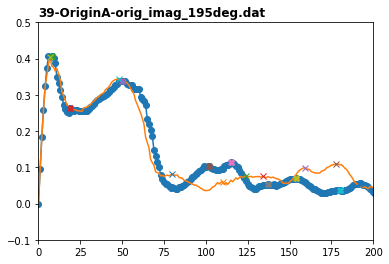

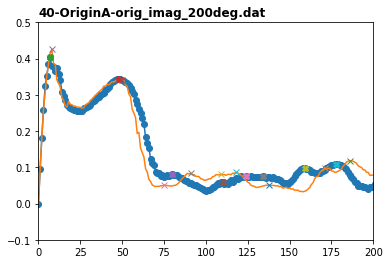

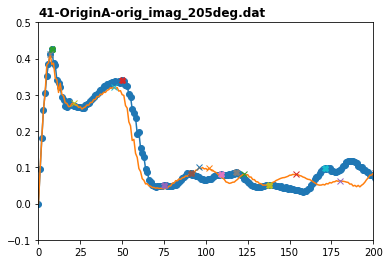

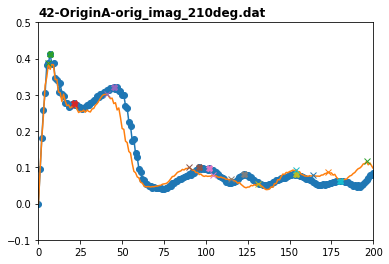

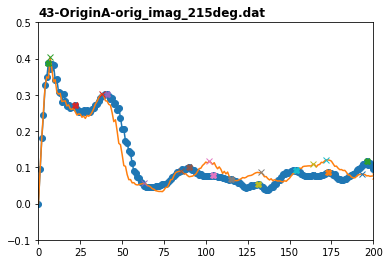

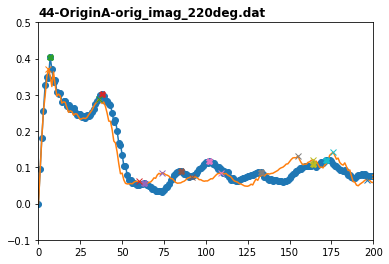

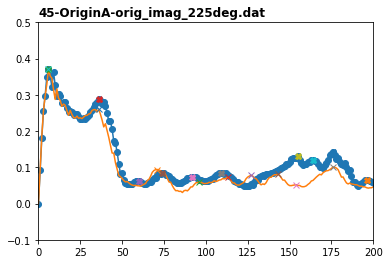

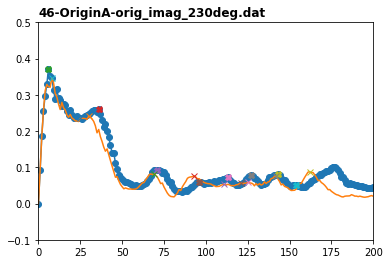

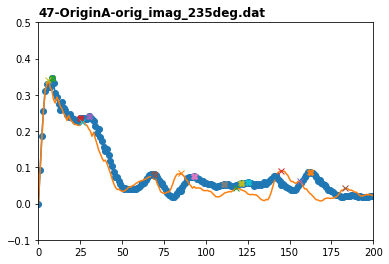

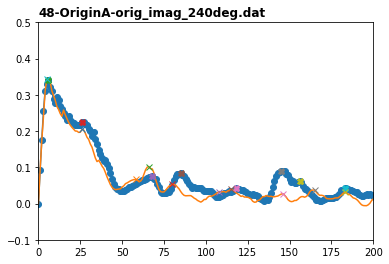

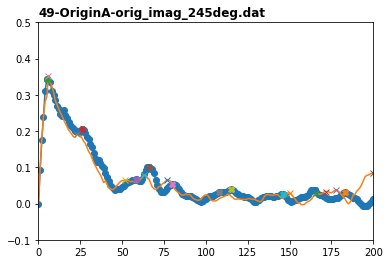

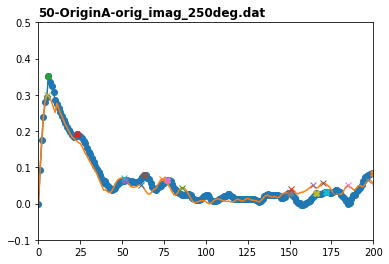

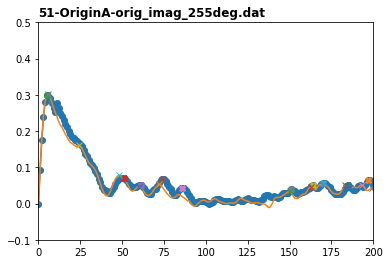

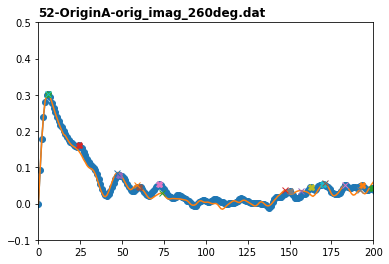

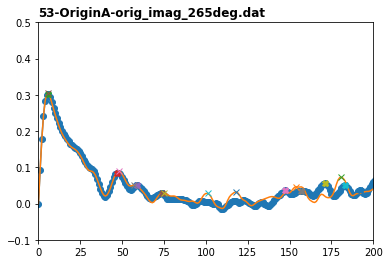

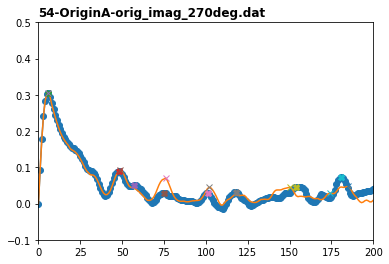

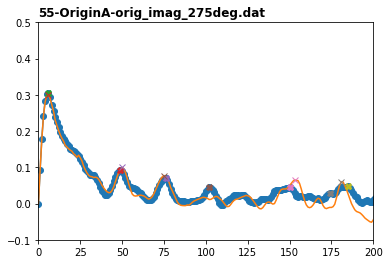

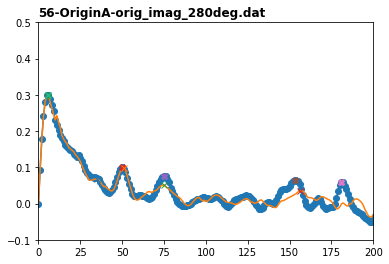

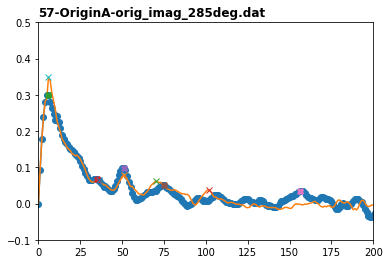

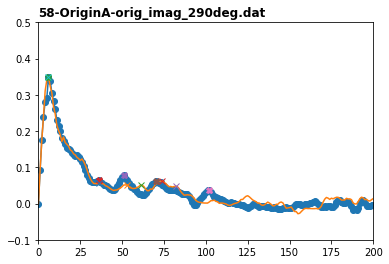

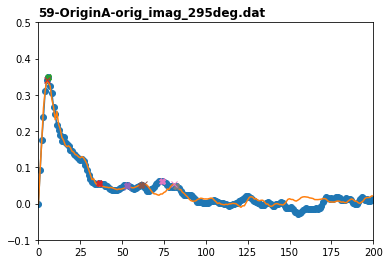

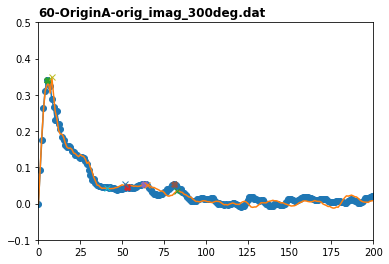

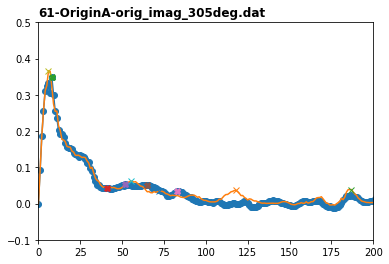

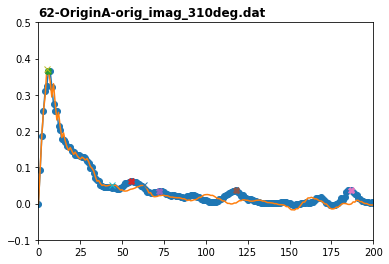

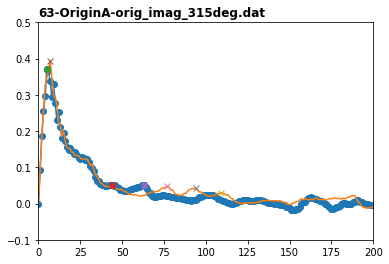

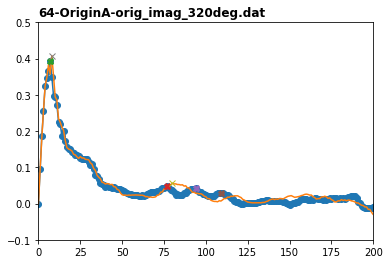

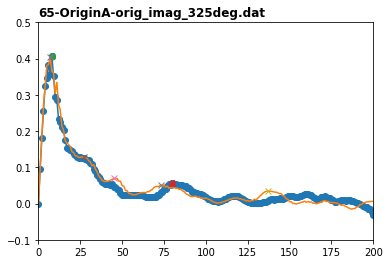

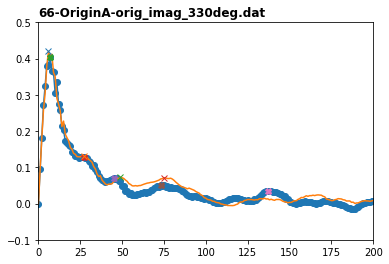

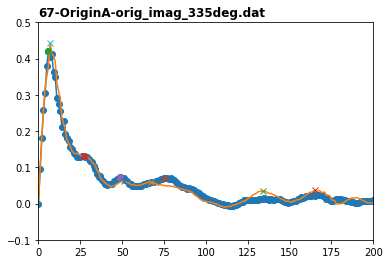

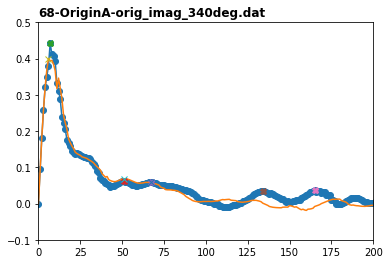

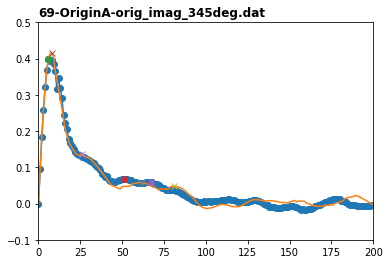

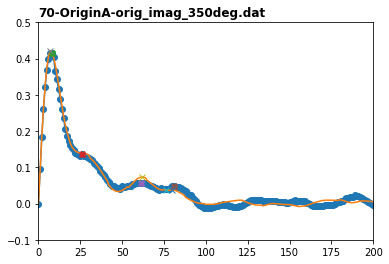

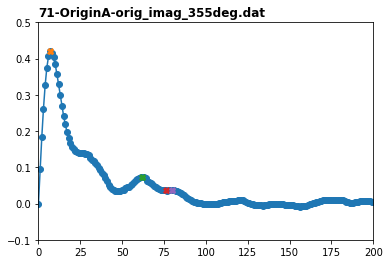

In [183]:
for i,_ in enumerate(valueA):
    plt.plot(distA[i], valueA[i],'o-')
    if i < len(valueA)-1:
        plt.plot(distA[i+1], valueA[i+1],'-')
    plt.title(str(i)+'-'+file_nameA[i], loc='left', fontsize=12, fontweight='bold')
    plt.xlim(0,200)
    plt.ylim(-0.1,0.5)
    for j in maxsA[i]:
        plt.plot(distA[i][j], valueA[i][j],'X')
    if i < len(valueA)-1:
        for j in maxsA[i+1]:
            plt.plot(distA[i+1][j], valueA[i+1][j],'x')
    plt.show()

In [6]:
f_nameA = 'profiles/pos_in_maxsA.dat'
fileMaxsA = np.loadtxt(f_nameA,dtype='str',usecols=range(1,7))

In [185]:
AA = prof.pos_in_maxs('A',fileMaxsA,maxsA)
#position of A
AposA = [i[1] for i in AA]
#angles where A is seen
AangA = [ang[i[0]] for i in AA]

In [186]:
# to pixels
ApixA = [prof.pixels(origin_A, AposA[i], AangA[i]) for i,_ in enumerate(AposA)] 
# save pixels to CASA crtf
prof.save_pixels('PosA(A)',ApixA)

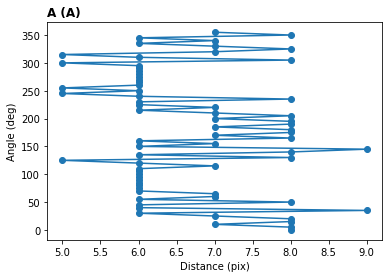

In [187]:
#plot them
plt.plot(AposA,AangA,'o-')
plt.title('A (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [188]:
AB = prof.pos_in_maxs('B',fileMaxsA,maxsA)
#position of B
AposB = [i[1] for i in AB]
#angles where B is seen
AangB = [ang[i[0]] for i in AB]

In [189]:
ApixB = [prof.pixels(origin_A, AposB[i], AangB[i]) for i,_ in enumerate(AposB)] 
# save pixels to CASA crtf
prof.save_pixels('PosB(A)',ApixB)

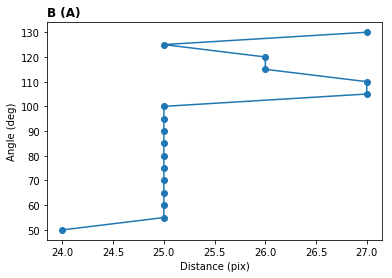

In [190]:
plt.plot(AposB,AangB,'o-')
plt.title('B (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [191]:
AS1 = prof.pos_in_maxs('S1',fileMaxsA,maxsA)
#position of S1 (for sure)
AposS1 = [i[1] for i in AS1]
#angles where B is seen
AangS1 = [ang[i[0]] for i in AS1]

In [192]:
AS1d = prof.pos_in_maxs('S1?',fileMaxsA,maxsA)
#position of S1 (doubts)
AposS1d = [i[1] for i in AS1d]
#angles where B is seen
AangS1d = [ang[i[0]] for i in AS1d]

In [193]:
ApixS1 = [prof.pixels(origin_A, AposS1[i], AangS1[i]) for i,_ in enumerate(AposS1)] 
# save pixels to CASA crtf
prof.save_pixels('PosS1(A)',ApixS1,'blue')

In [194]:
ApixS1d = [prof.pixels(origin_A, AposS1d[i], AangS1d[i]) for i,_ in enumerate(AposS1d)] 
# save pixels to CASA crtf
prof.save_pixels('PosS1(A)-duda',ApixS1d,'magenta')

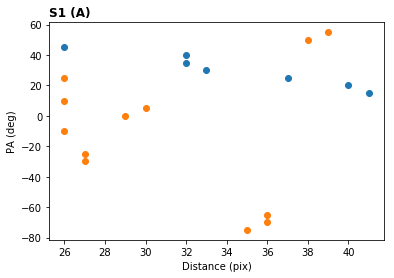

In [195]:
Anew_ang1 = prof.new_angle(ang,180)
nAangS1 = [Anew_ang1[i[0]] for i in AS1]
nAangS1d = [Anew_ang1[i[0]] for i in AS1d]
plt.plot(AposS1,nAangS1,'o')
plt.plot(AposS1d,nAangS1d,'o')
#plt.plot(posS2d,angS2d,'o')
plt.title('S1 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('PA (deg)')
plt.show()

In [196]:
AS2 = prof.pos_in_maxs('S2',fileMaxsA,maxsA)
#position of S2 (for sure)
AposS2 = [i[1] for i in AS2]
#angles where S2 is seen
AangS2 = [ang[i[0]] for i in AS2]

In [197]:
ApixS2 = [prof.pixels(origin_A, AposS2[i], AangS2[i]) for i,_ in enumerate(AposS2)] 
# save pixels to CASA crtf
prof.save_pixels('PosS2(A)',ApixS2)

In [198]:
AS2d = prof.pos_in_maxs('S2?',fileMaxsA,maxsA)
#position of S2 (doubts)
AposS2d = [i[1] for i in AS2d]
#angles where S2 is seen
AangS2d = [ang[i[0]] for i in AS2d]

In [199]:
ApixS2d = [prof.pixels(origin_A, AposS2d[i], AangS2d[i]) for i,_ in enumerate(AposS2d)] 
# save pixels to CASA crtf
prof.save_pixels('PosS2(A)-duda',ApixS2d,'magenta')

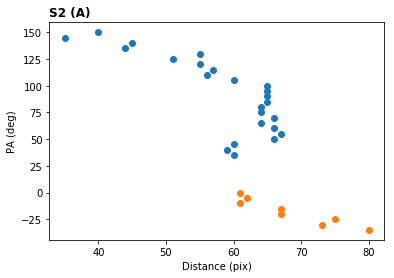

In [200]:
Anew_ang2 = prof.new_angle(ang,180)
nAangS2 = [Anew_ang2[i[0]] for i in AS2]
nAangS2d = [Anew_ang2[i[0]] for i in AS2d]
plt.plot(AposS2,nAangS2,'o')
plt.plot(AposS2d,nAangS2d,'o')
plt.title('S2 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('PA (deg)')
plt.show()

In [201]:
AS3 = prof.pos_in_maxs('S3',fileMaxsA,maxsA)
#position of S3 (for sure)
AposS3 = [i[1] for i in AS3]
#angles where S3 is seen
AangS3 = [ang[i[0]] for i in AS3]

In [202]:
ApixS3 = [prof.pixels(origin_A, AposS3[i], AangS3[i]) for i,_ in enumerate(AposS3)] 
# save pixels to CASA crtf
prof.save_pixels('PosS3(A)',ApixS3)

In [203]:
AS3d = prof.pos_in_maxs('S3?',fileMaxsA,maxsA)
#position of S3 (doubts)
AposS3d = [i[1] for i in AS3d]
#angles where S3 is seen
AangS3d = [ang[i[0]] for i in AS3d]

In [204]:
ApixS3d = [prof.pixels(origin_A, AposS3d[i], AangS3d[i]) for i,_ in enumerate(AposS3d)] 
# save pixels to CASA crtf
prof.save_pixels('PosS3(A)-duda',ApixS3d,'magenta')

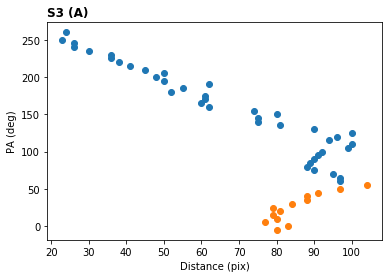

In [205]:
Anew_ang3 = prof.new_angle(ang,300)
nAangS3 = [Anew_ang3[i[0]] for i in AS3]
nAangS3d = [Anew_ang3[i[0]] for i in AS3d]
plt.plot(AposS3,nAangS3,'o')
plt.plot(AposS3d,nAangS3d,'o')
plt.title('S3 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('PA (deg)')
plt.show()

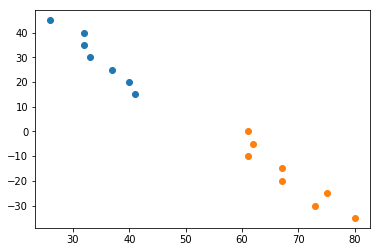

In [206]:
# who are the dudosos?
plt.plot(AposS1,nAangS1,'o')
#plt.plot(AposS2,nAangS2,'o')
#plt.plot(AposS1d,nAangS1d,'o')
plt.plot(AposS2d,nAangS2d,'o')
#plt.plot(AposS3d,nAangS3d,'o')
#plt.plot(AposS31d,nAangS31d,'o') #estos no me los creo
plt.show()

# Origin in B

In [7]:
file_base = 'profiles/OriginB-orig_imag'
ang_step = 5
ang = np.arange(0,360,ang_step)
file_nameB = [file_base+'_'+str(a)+'deg.dat' for a in ang]
profileB = [np.loadtxt(file) for file in file_nameB]
distB =  [i[:,0] for i in profileB]
valueB = np.multiply([i[:,1] for i in profileB],distB) 

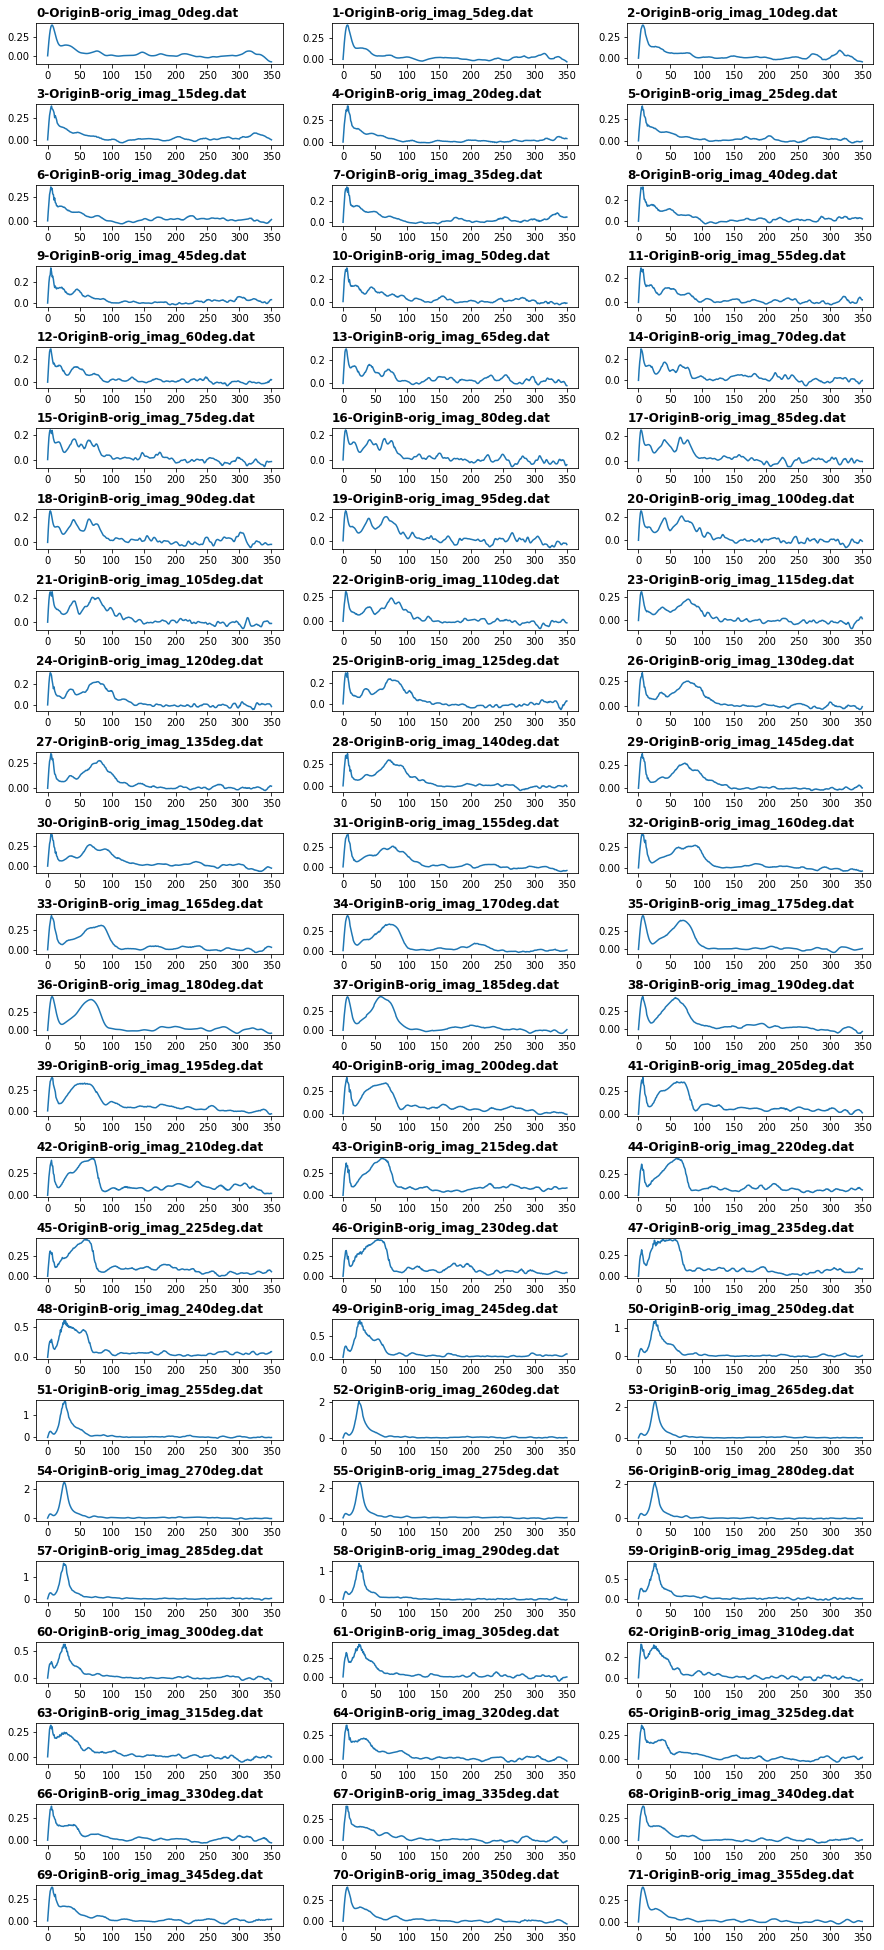

In [44]:
# multiple plots
columns = 3
plt.figure(figsize=(15,35))
plt.subplots_adjust(wspace = 0.2,hspace=1)
num=0
for name in range(len(file_nameB)):
    # Find the right spot on the plot
    plt.subplot(math.ceil(len(file_nameB)/columns),columns,num+1)
 
    # Plot the plots
    plt.plot(distB[num], valueB[num])
 
    # Same limits for everybody!
    #plt.xlim(0,10)
    #plt.ylim(-0.005,0.03)

    # Add title
    plt.title(str(num)+'-'+file_nameB[num], loc='left', fontsize=12, fontweight='bold')
    
    num+=1

In [46]:
cut = 1
maxsB = []
rmsB = statistics.stdev(valueB[29][150:-1])
for i in valueB:
    all_local_maxB = argrelextrema(i, np.greater,order=3)[0]
    true_local_maxB = np.where(i[all_local_maxB]>cut*rmsB)
    maxsB.append(all_local_maxB[true_local_maxB])
file_name_maxsB = 'profiles/maxsB-'+str(cut)+'sigma.dat'
prof.write_maxs(file_name_maxsB,maxsB)

In [47]:
file_name_maxsB = 'profiles/maxsB-1sigma.dat'
maxsB = prof.load_maxs(file_name_maxsB)

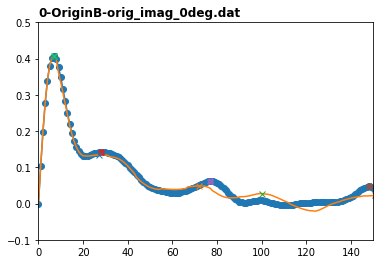

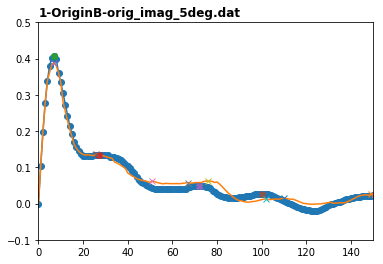

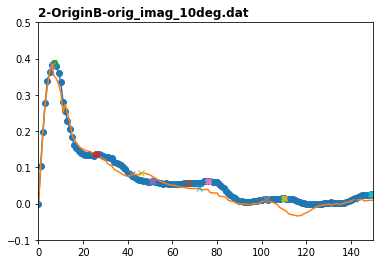

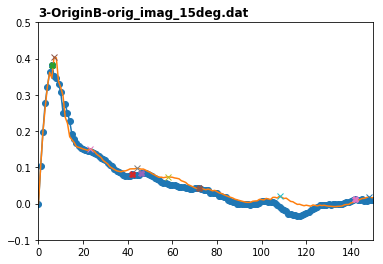

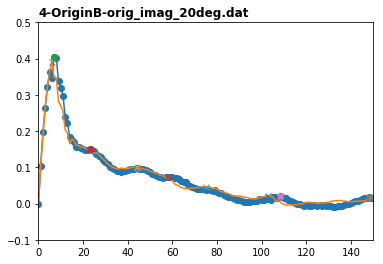

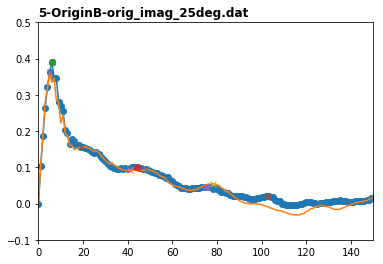

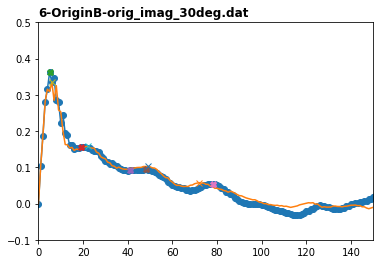

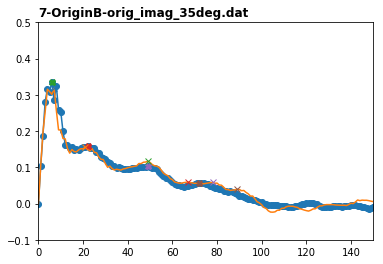

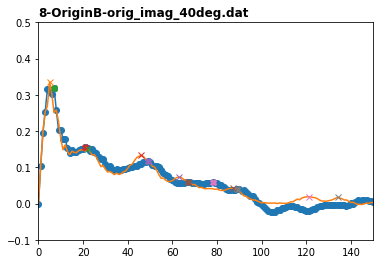

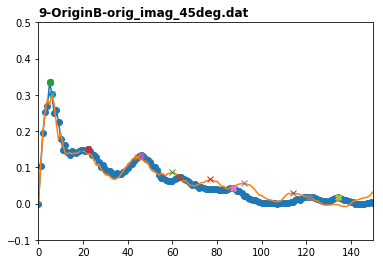

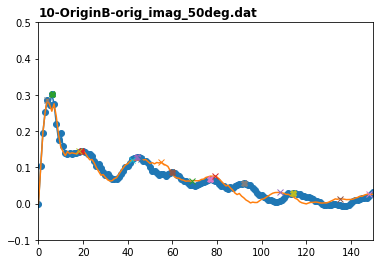

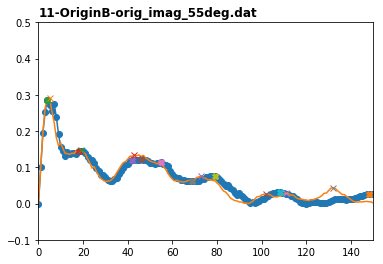

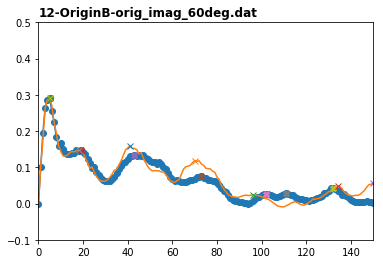

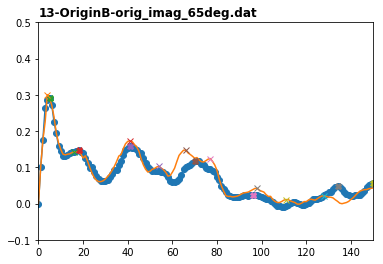

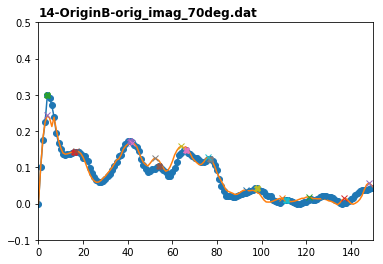

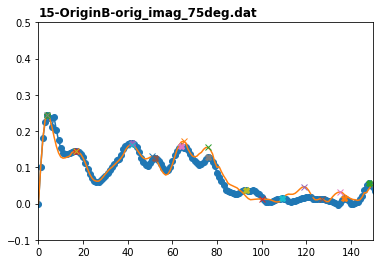

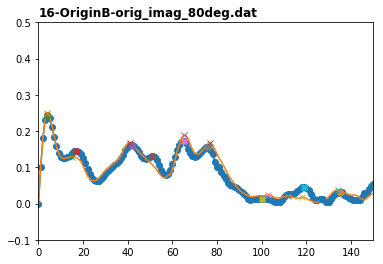

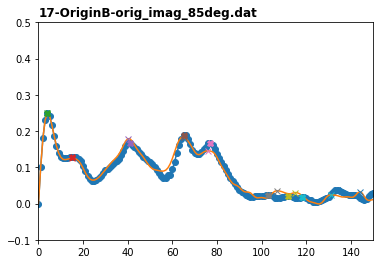

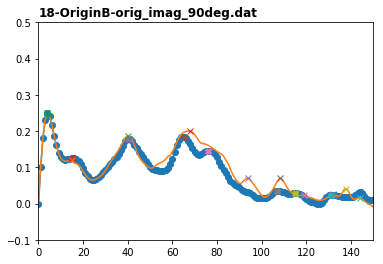

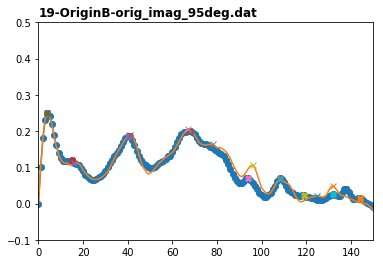

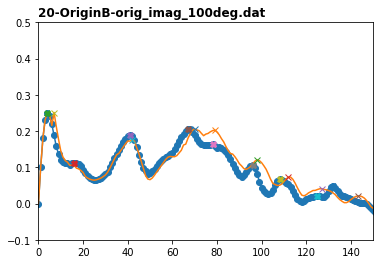

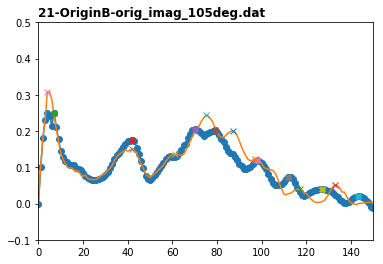

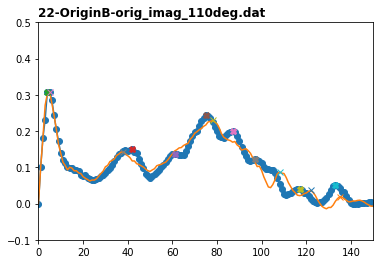

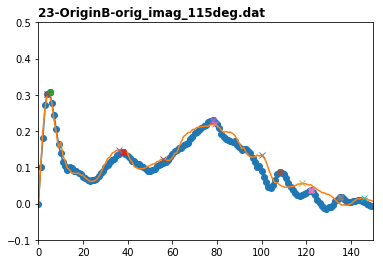

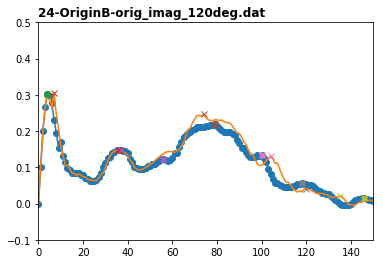

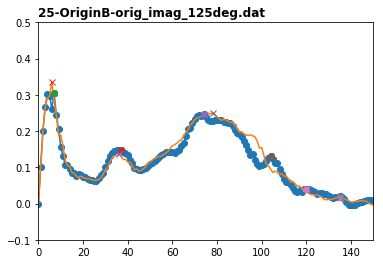

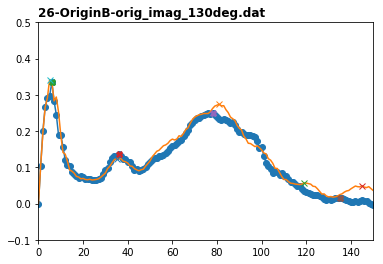

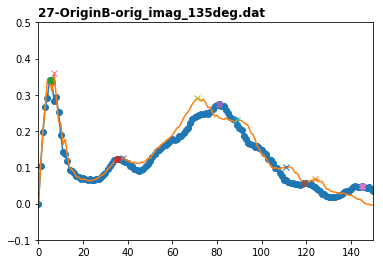

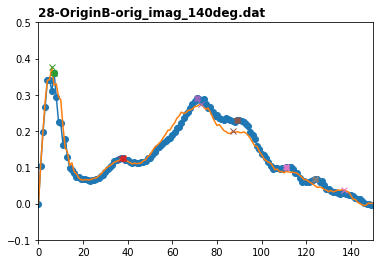

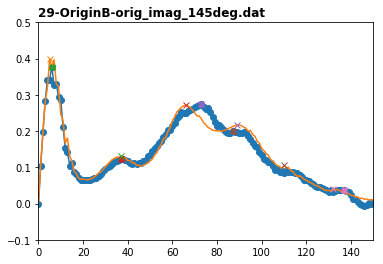

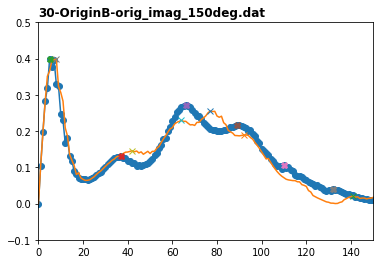

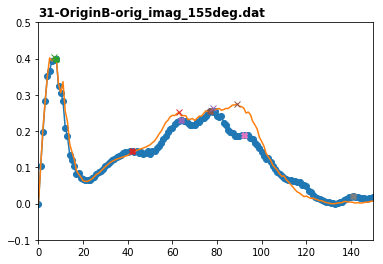

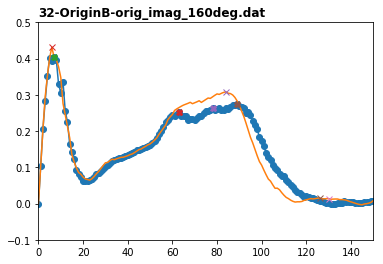

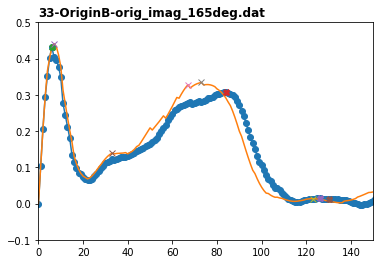

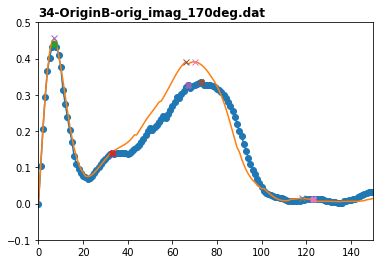

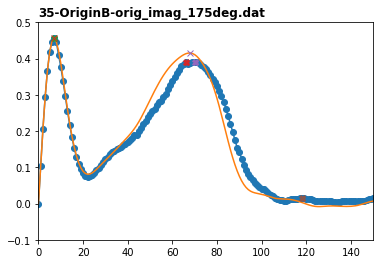

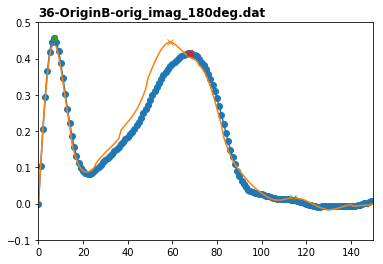

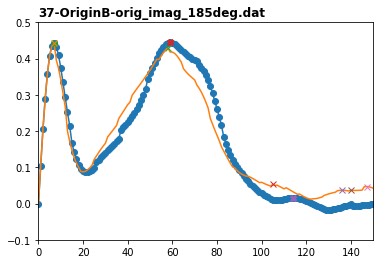

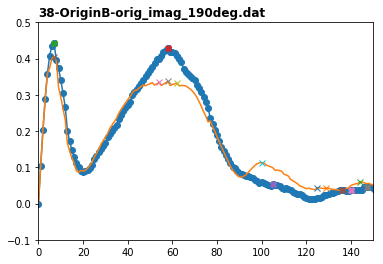

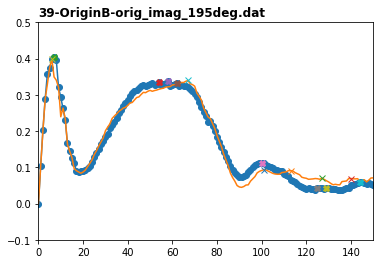

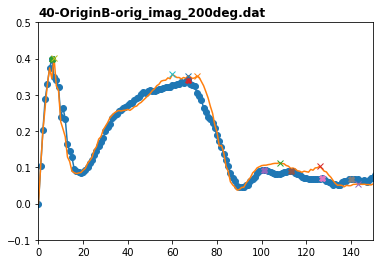

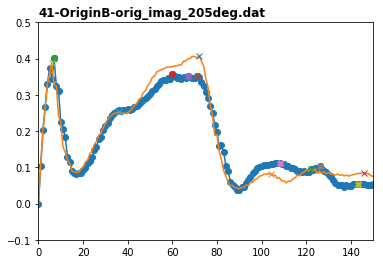

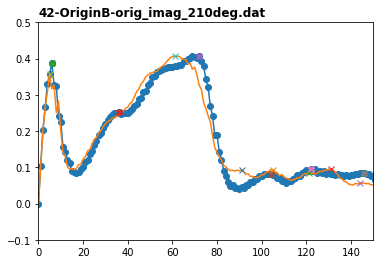

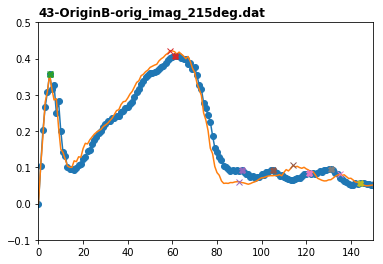

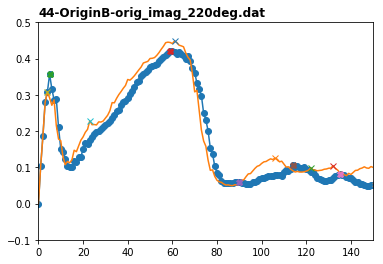

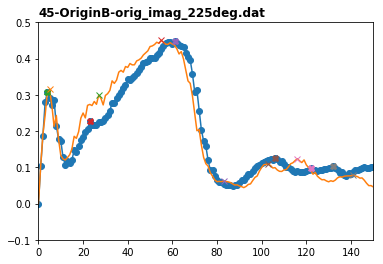

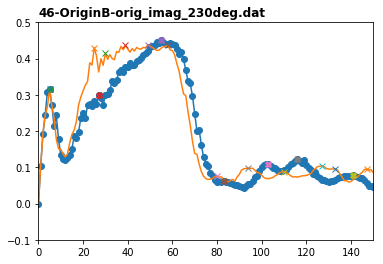

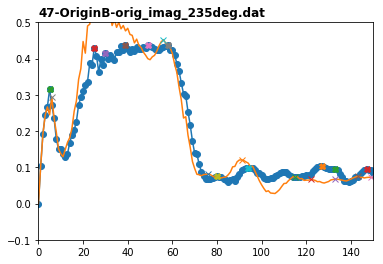

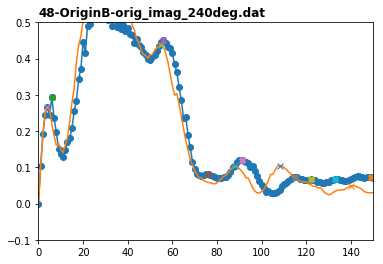

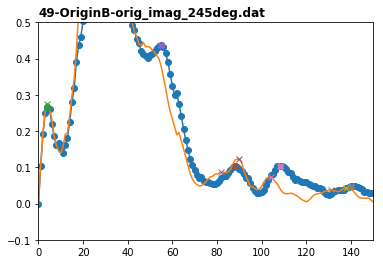

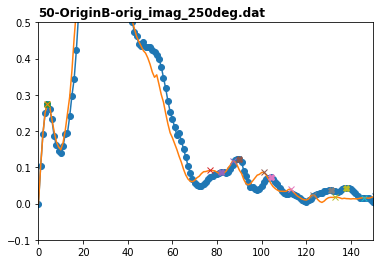

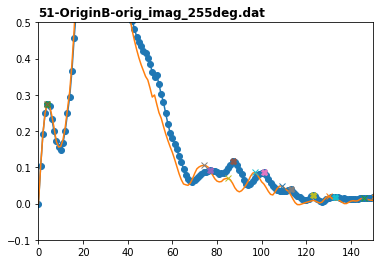

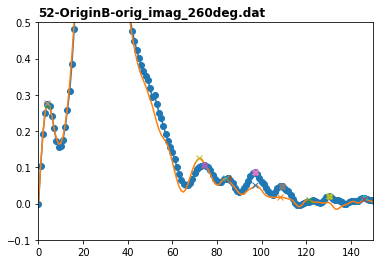

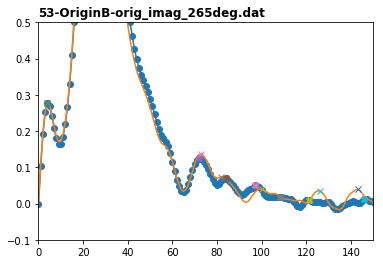

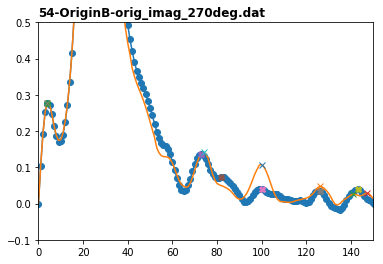

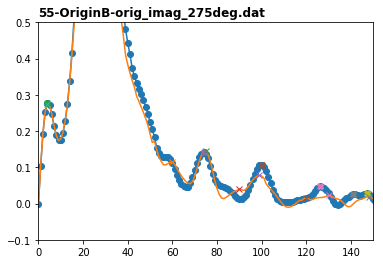

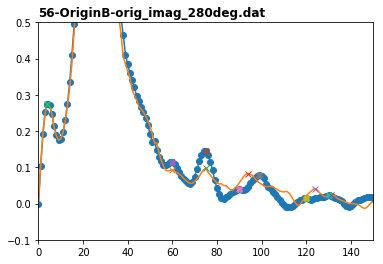

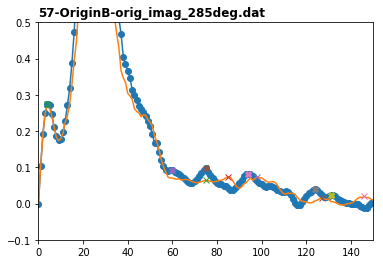

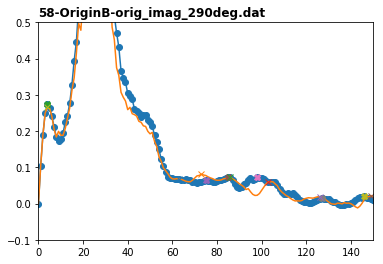

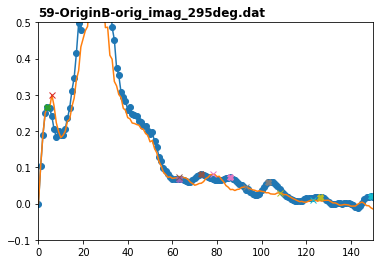

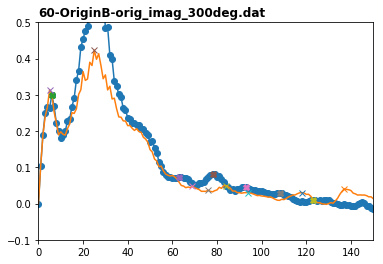

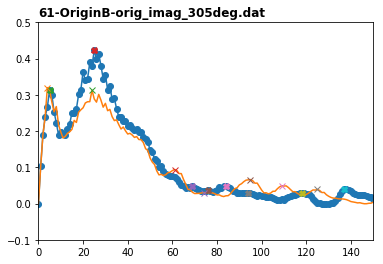

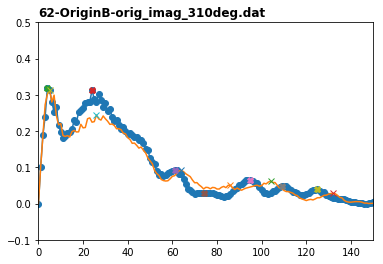

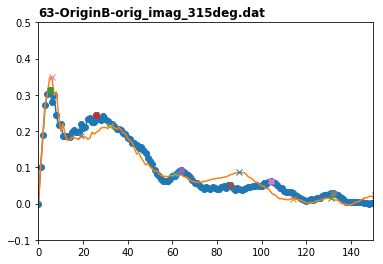

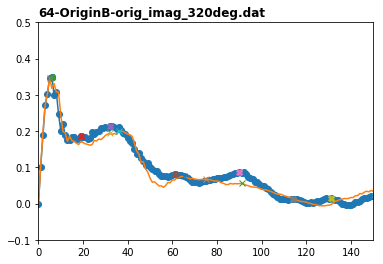

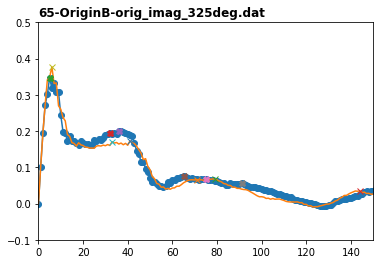

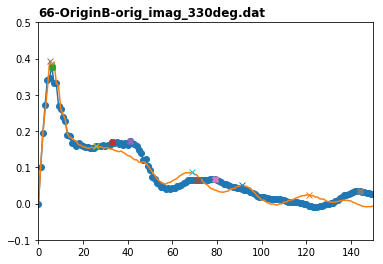

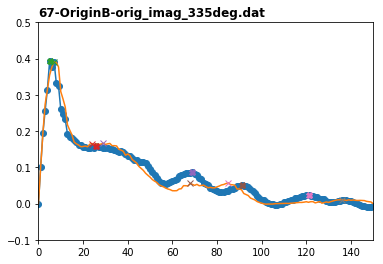

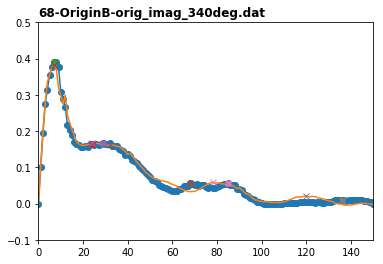

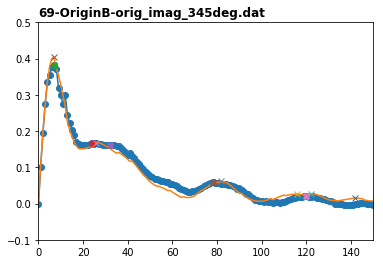

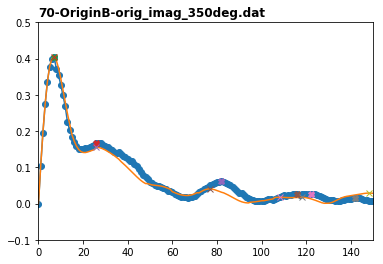

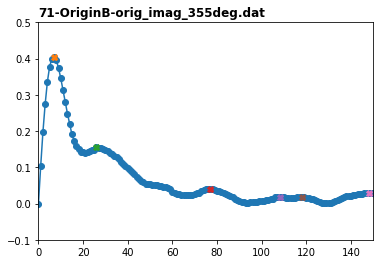

In [49]:
for i,_ in enumerate(valueB):
    plt.plot(distB[i], valueB[i],'o-')
    if i < len(valueB)-1:
        plt.plot(distB[i+1], valueB[i+1],'-')
    plt.title(str(i)+'-'+file_nameB[i], loc='left', fontsize=12, fontweight='bold')
    plt.xlim(0,150)
    plt.ylim(-0.1,0.5)
    for j in maxsB[i]:
        plt.plot(distB[i][j], valueB[i][j],'X')
    if i < len(valueB)-1:
        for j in maxsB[i+1]:
            plt.plot(distB[i+1][j], valueB[i+1][j],'x')
    plt.show()

In [151]:
f_nameB = 'pos_in_maxsB.dat'
fileMaxsB = np.loadtxt(f_nameB,dtype='str',usecols=range(1,7))

In [158]:
BB = prof.pos_in_maxs('B',fileMaxsB,maxsB)
#position of B
BposB = [i[1] for i in BB]
#angles where B is seen
BangB = [ang[i[0]] for i in BB]

In [159]:
BpixB = [prof.pixels(origin_B, BposB[i], BangB[i]) for i,_ in enumerate(BposB)] 
# save pixels to CASA crtf
prof.save_pixels('PosB(B)',BpixB)

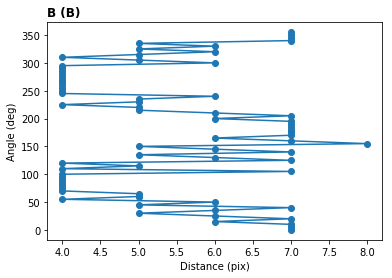

In [160]:
plt.plot(BposB,BangB,'o-')
plt.title('B (B)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [161]:
BA = prof.pos_in_maxs('A',fileMaxsB,maxsB)
#position of A
BposA = [i[1] for i in BA]
#angles where A is seen
BangA = [ang[i[0]] for i in BA]

In [162]:
BpixA = [prof.pixels(origin_B, BposA[i], BangA[i]) for i,_ in enumerate(BposA)] 
# save pixels to CASA crtf
prof.save_pixels('PosA(B)',BpixA)

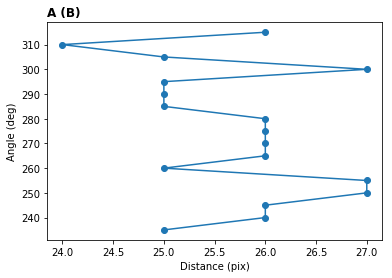

In [163]:
plt.plot(BposA,BangA,'o-')
plt.title('A (B)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [164]:
BS1 = prof.pos_in_maxs('S1',fileMaxsB,maxsB)
#position of S1
BposS1 = [i[1] for i in BS1]
#angles where S1 is seen
BangS1 = [ang[i[0]] for i in BS1]

In [165]:
BpixS1 = [prof.pixels(origin_B, BposS1[i], BangS1[i]) for i,_ in enumerate(BposS1)] 
# save pixels to CASA crtf
prof.save_pixels('PosS1(B)',BpixS1,symbol='x')

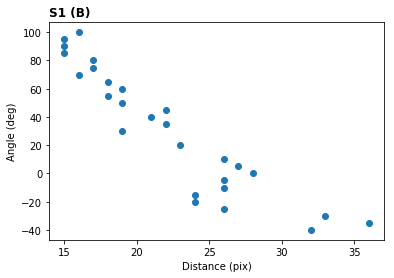

In [166]:
Bnew_angS1 = prof.new_angle(ang,180)
nBangS1 = [Bnew_angS1[i[0]] for i in BS1]
plt.plot(BposS1,nBangS1,'o')
plt.title('S1 (B)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [167]:
BS2 = prof.pos_in_maxs('S2',fileMaxsB,maxsB)
#position of S2 (for sure)
BposS2 = [i[1] for i in BS2]
#angles where S2 is seen
BangS2 = [ang[i[0]] for i in BS2]

In [168]:
BS2d = prof.pos_in_maxs('S2?',fileMaxsB,maxsB)
#position of S2 (doubts)
BposS2d = [i[1] for i in BS2d]
#angles where S2 is seen
BangS2d = [ang[i[0]] for i in BS2d]

In [169]:
BpixS2 = [prof.pixels(origin_B, BposS2[i], BangS2[i]) for i,_ in enumerate(BposS2)] 
# save pixels to CASA crtf
prof.save_pixels('PosS2(B)',BpixS2,symbol='x')

In [170]:
BpixS2d = [prof.pixels(origin_B, BposS2d[i], BangS2d[i]) for i,_ in enumerate(BposS2d)] 
# save pixels to CASA crtf
prof.save_pixels('PosS2(B)-duda',BpixS2d,symbol='x',color='magenta')

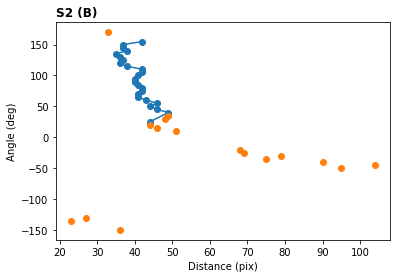

In [171]:
Bnew_angS2 = prof.new_angle(ang,180)
nBangS2 = [Bnew_angS2[i[0]] for i in BS2]
nBangS2d = [Bnew_angS2[i[0]] for i in BS2d]
plt.plot(BposS2,nBangS2,'o-')
plt.plot(BposS2d,nBangS2d,'o')
plt.title('S2 (B)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [172]:
BS3 = prof.pos_in_maxs('S3',fileMaxsB,maxsB)
#position of S3 (for sure)
BposS3 = [i[1] for i in BS3]
#angles where S3 is seen
BangS3 = [ang[i[0]] for i in BS3]

In [173]:
BS3d = prof.pos_in_maxs('S3?',fileMaxsB,maxsB)
#position of S3 (doubts)
BposS3d = [i[1] for i in BS3d]
#angles where S3 is seen
BangS3d = [ang[i[0]] for i in BS3d]

In [174]:
BpixS3 = [prof.pixels(origin_B, BposS3[i], BangS3[i]) for i,_ in enumerate(BposS3)] 
# save pixels to CASA crtf
prof.save_pixels('PosS3(B)',BpixS3,symbol='x')

In [175]:
BpixS3d = [prof.pixels(origin_B, BposS3d[i], BangS3d[i]) for i,_ in enumerate(BposS3d)] 
# save pixels to CASA crtf
prof.save_pixels('PosS3(B)-duda',BpixS3d,symbol='x',color='magenta')

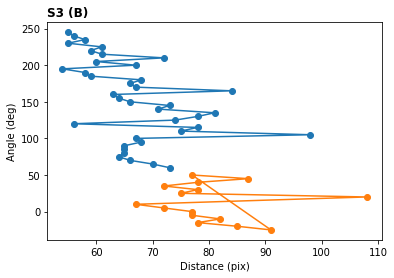

In [176]:
Bnew_angS3 = prof.new_angle(ang,300)
nBangS3 = [Bnew_angS3[i[0]] for i in BS3]
nBangS3d = [Bnew_angS3[i[0]] for i in BS3d]
plt.plot(BposS3,nBangS3,'o-')
plt.plot(BposS3d,nBangS3d,'o-')
plt.title('S3 (B)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [ ]:
# who are the dudosos?

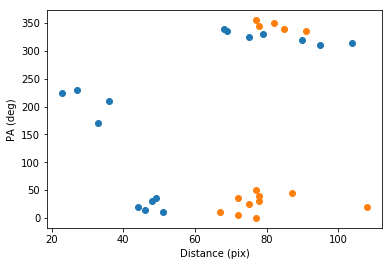

In [177]:
plt.plot(BposS2d,BangS2d,'o')
plt.plot(BposS3d,BangS3d,'o')
plt.xlabel('Distance (pix)')
plt.ylabel('PA (deg)')
plt.show()

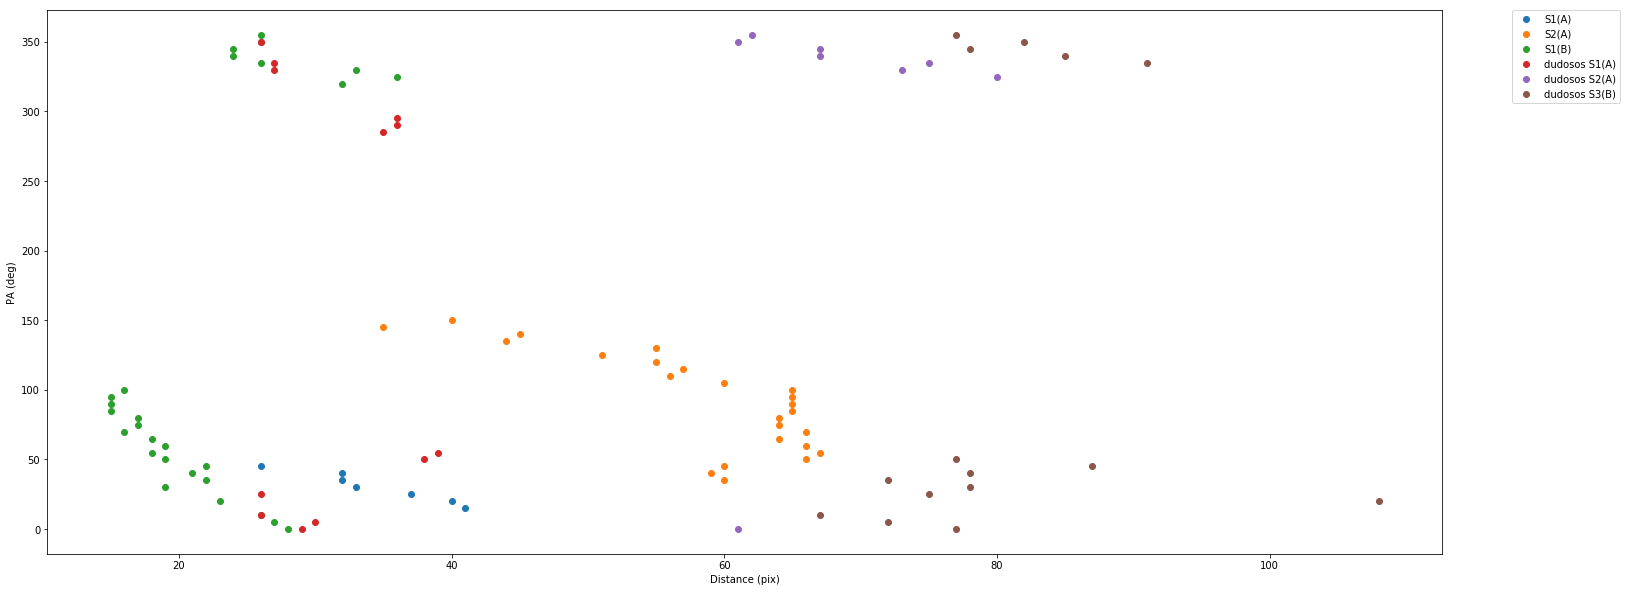

In [178]:
plt.figure(figsize=(25,10))
#plt.plot(AposA,ang,'o',label='A(A)')
#plt.plot(AposB,AangB,'o',label='A(B)')
#plt.plot(BposA,BangA,'o',label='B(A)')
#plt.plot(BposB,ang,'o',label='B(B)')
plt.plot(AposS1,AangS1,'o',label='S1(A)')
plt.plot(AposS2,AangS2,'o',label='S2(A)')
#plt.plot(AposS3,AangS3,'o',label='S3(A)')
plt.plot(BposS1,BangS1,'o',label='S1(B)')
#plt.plot(BposS2,BangS2,'o',label='S2(B)')
#plt.plot(BposS3,BangS3,'o',label='S3(B)')
plt.plot(AposS1d,AangS1d,'o',label='dudosos S1(A)')
plt.plot(AposS2d,AangS2d,'o',label='dudosos S2(A)')
#plt.plot(AposS3d,AangS3d,'o',label='dudosos S3(A)')
#plt.plot(AposS31d,AangS31d,'o',label='dudosos S31(A)')
#plt.plot(BposS2d,BangS2d,'o',label='dudosos S2(B)')
plt.plot(BposS3d,BangS3d,'o',label='dudosos S3(B)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Distance (pix)')
plt.ylabel('PA (deg)')
plt.show()

## Gaussian fits

### (Pendiente: poner errores en el plot)

In [8]:
file_name_maxsA = 'profiles/maxsA-1sigma.dat'
maxsA = prof.load_maxs(file_name_maxsA)
f_nameA = 'profiles/pos_in_maxsA.dat'
fileMaxsA = np.loadtxt(f_nameA,dtype='str',usecols=range(1,7))

In [4]:
x, y = np.where(fileMaxsA != '-')
true_maxsA = prof.find_true_maxs(maxsA, x, y)

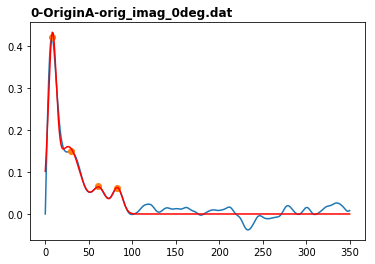

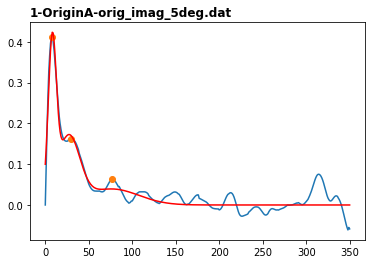

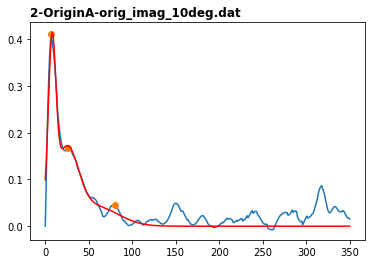

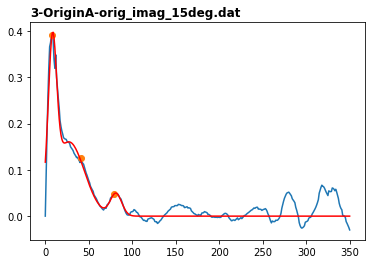

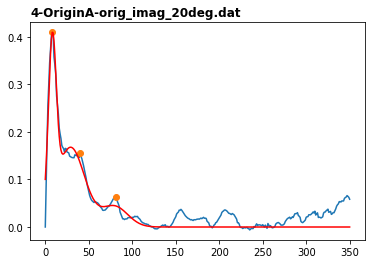

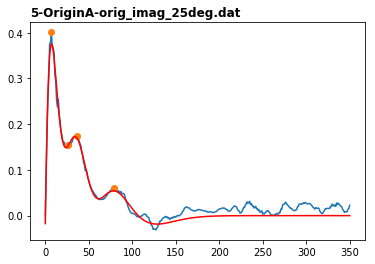

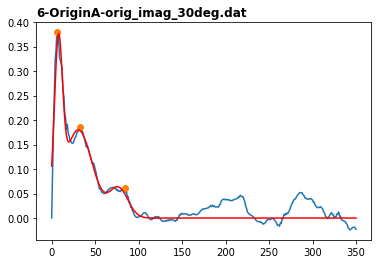

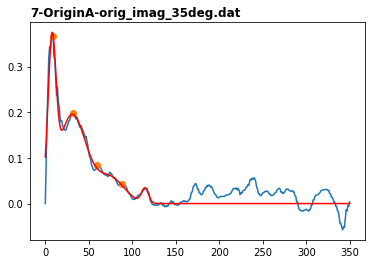

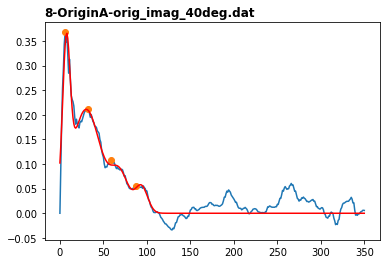

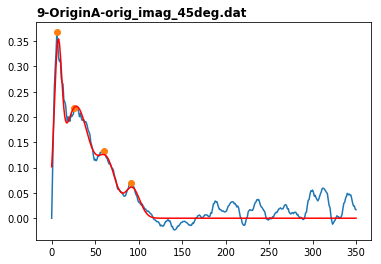

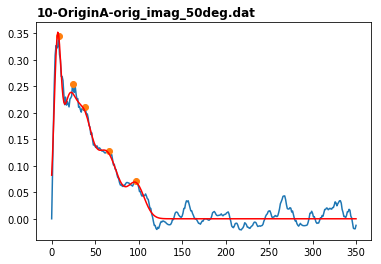

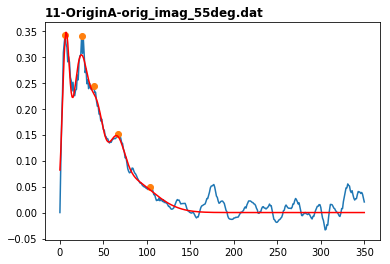

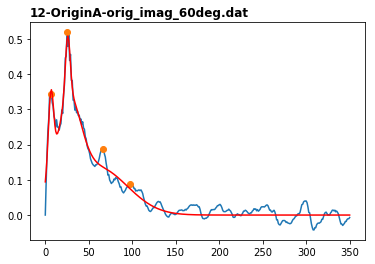

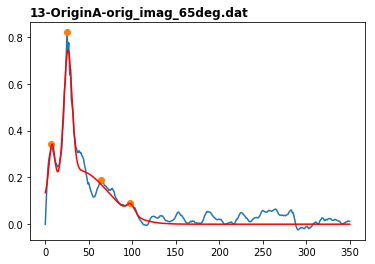

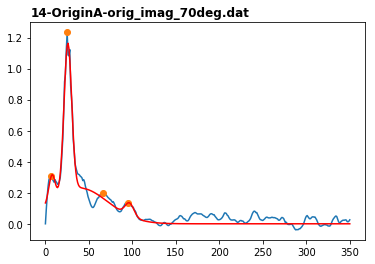

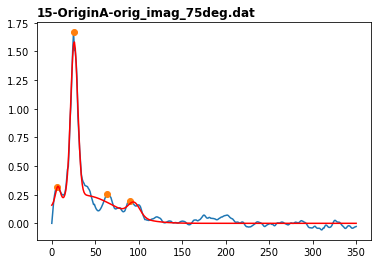

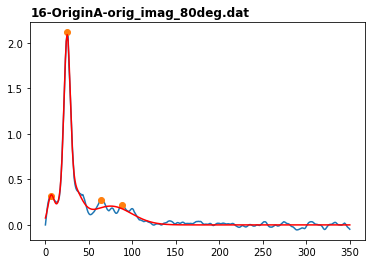

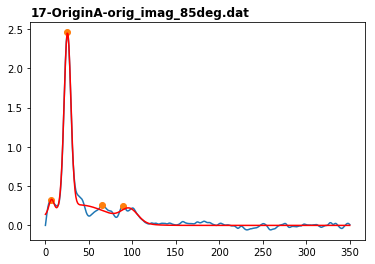

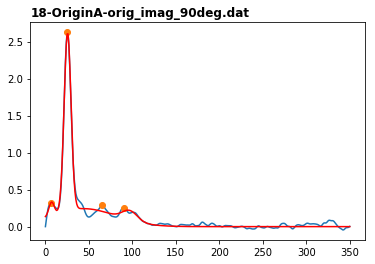

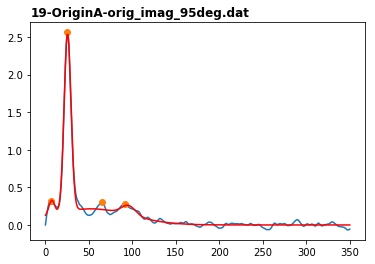

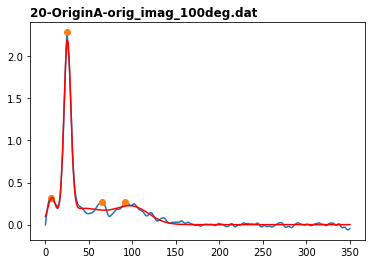

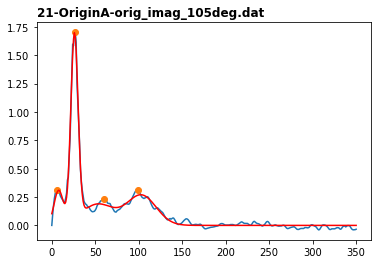

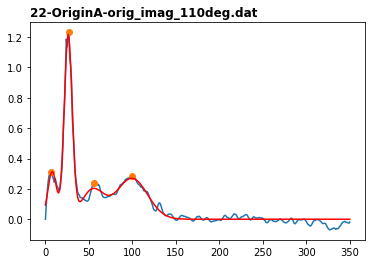

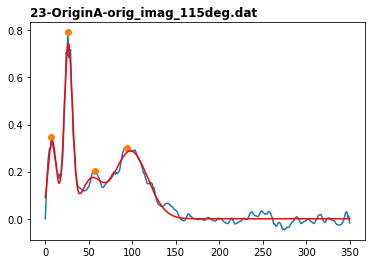

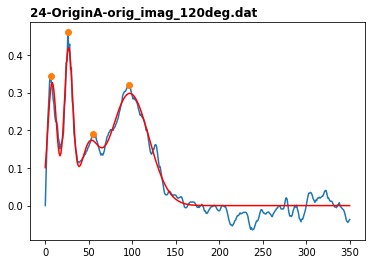

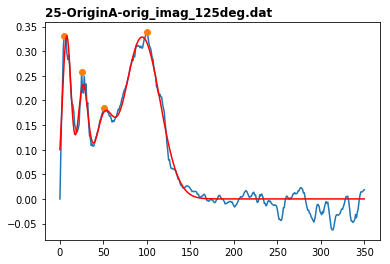

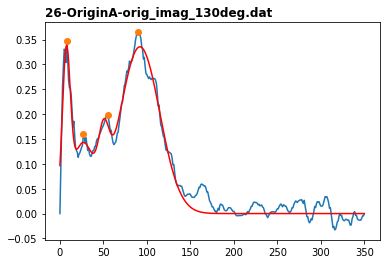

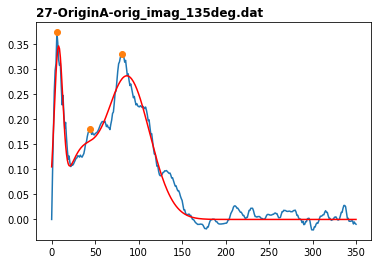

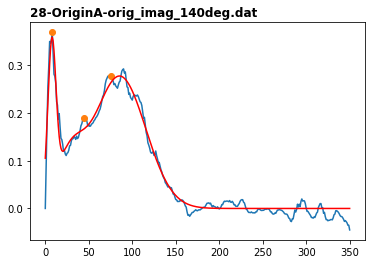

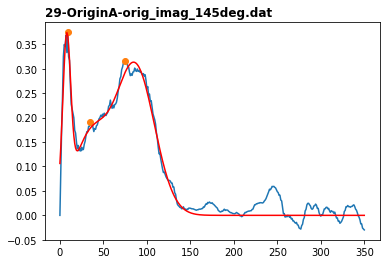

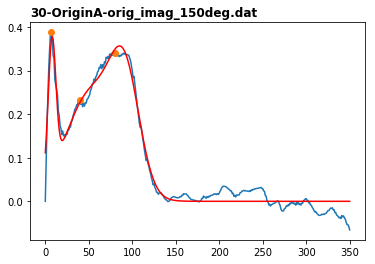

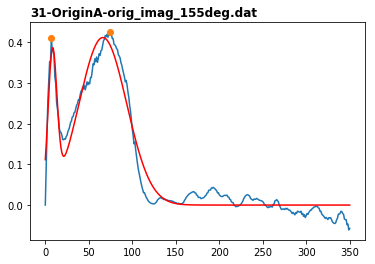

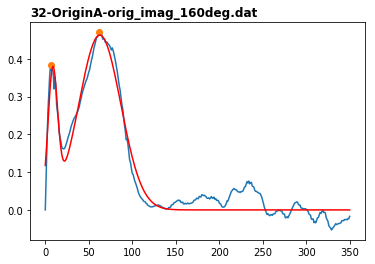

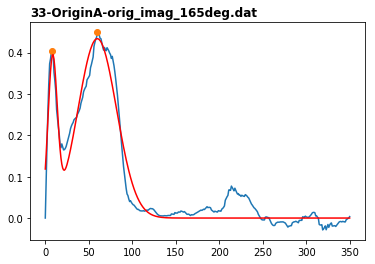

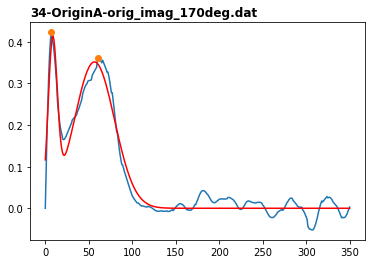

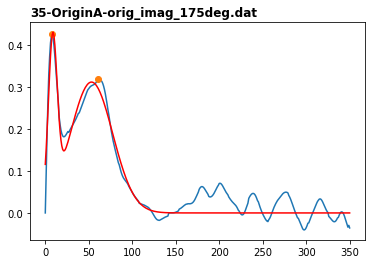

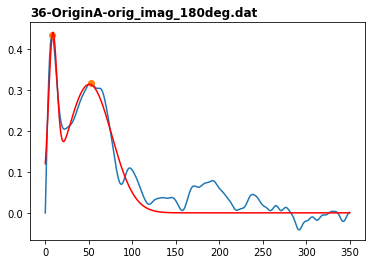

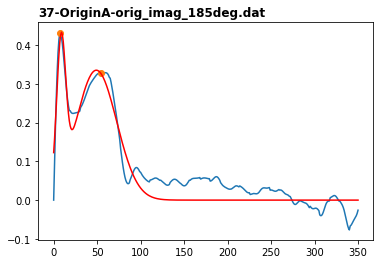

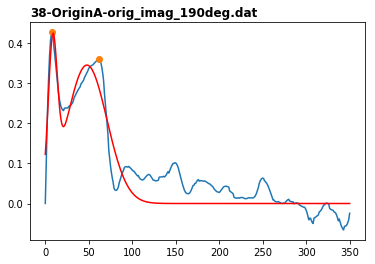

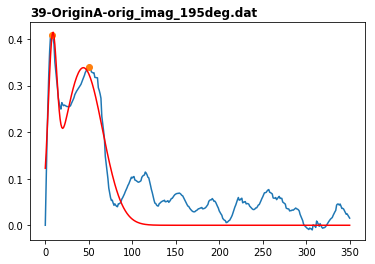

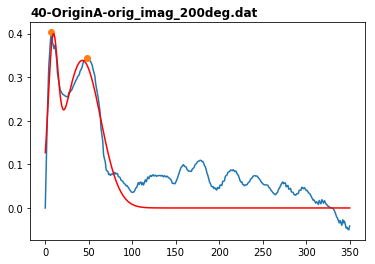

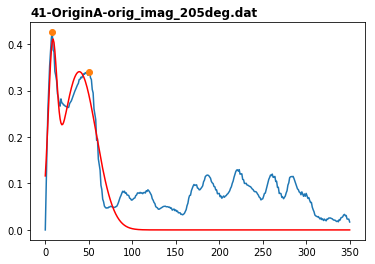

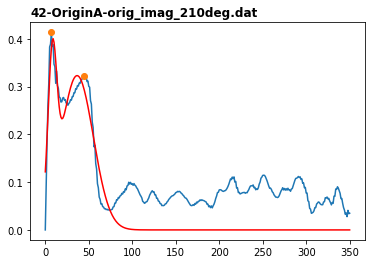

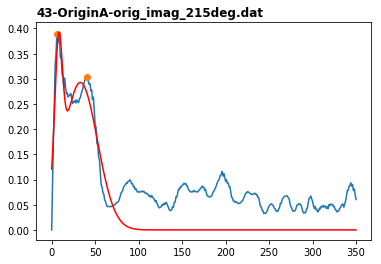

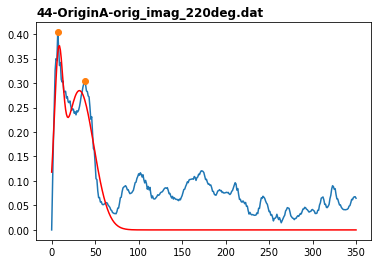

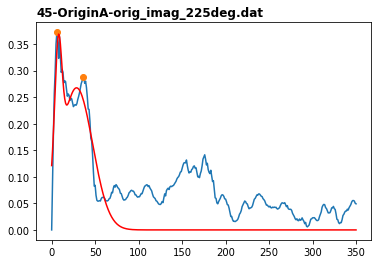

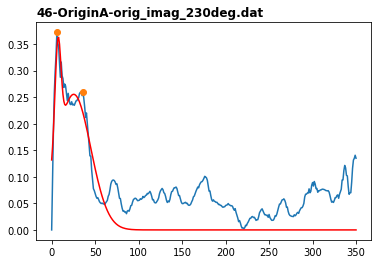

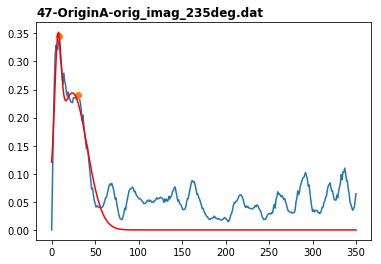

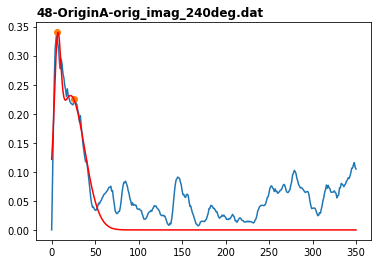

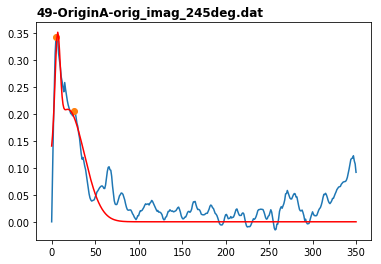

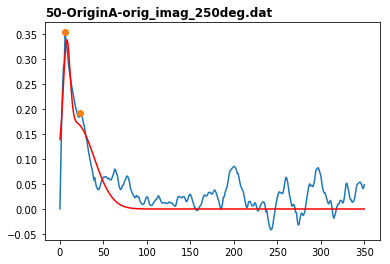

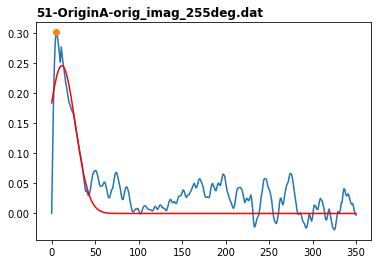

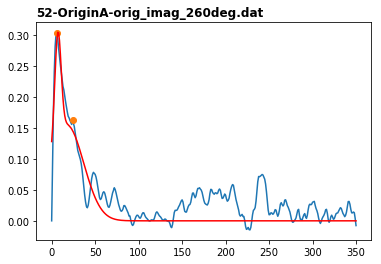

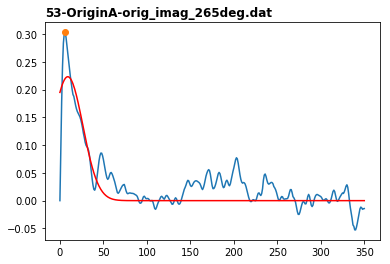

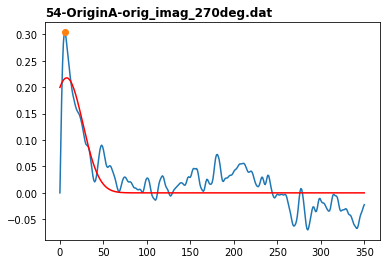

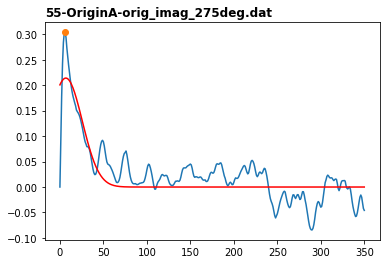

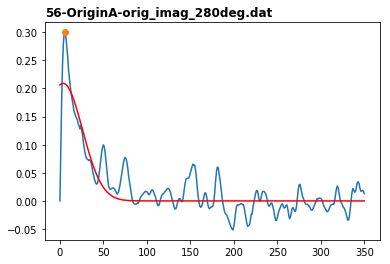

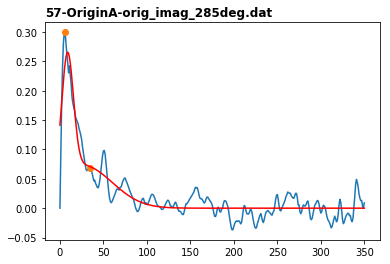

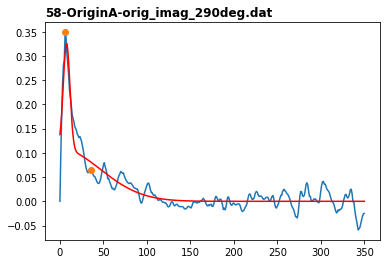

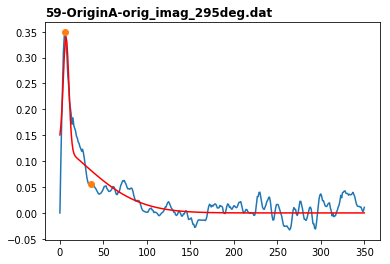

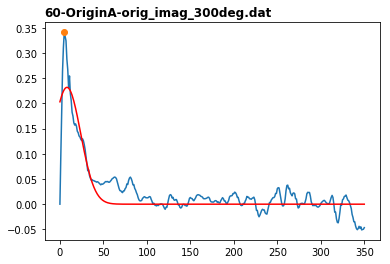

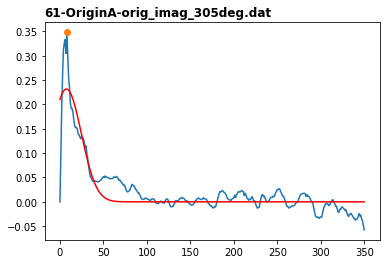

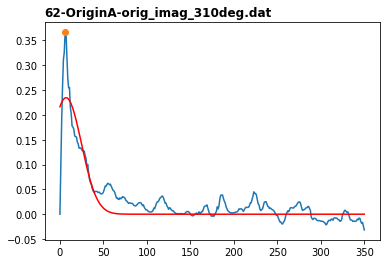

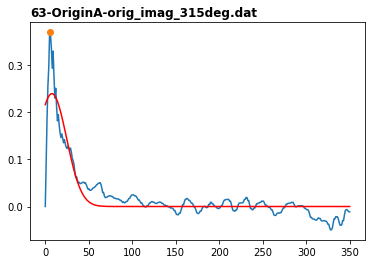

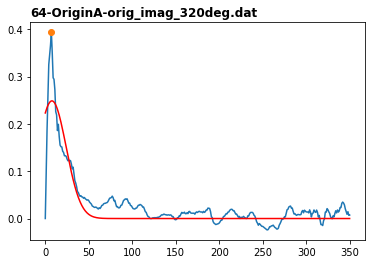

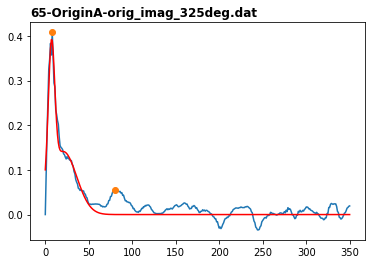

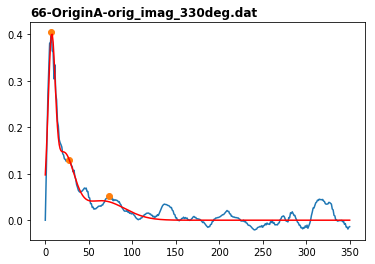

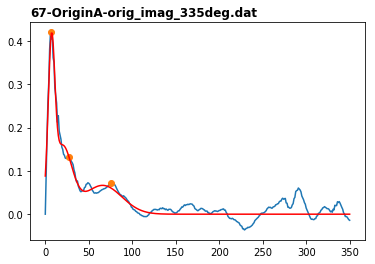

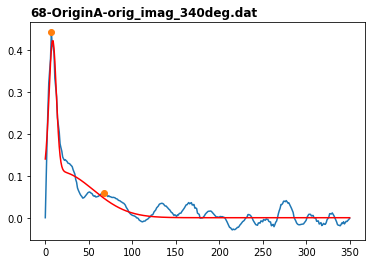

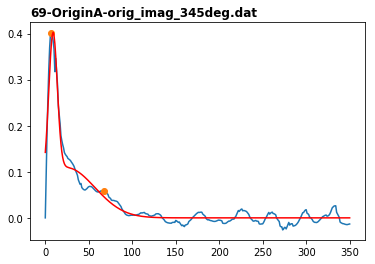

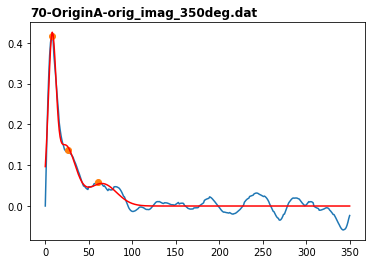

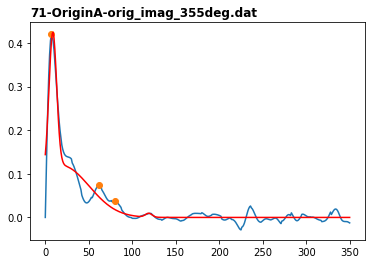

In [17]:
centersA = []
amplitudesA = []
widthsA = []
for i,m in enumerate(true_maxsA):
    l = len(m)
    amp=[1]*l
    wid=[10]*l
    guess_list = list(zip(m,amp,wid))
    guess = [item for sublist in guess_list for item in sublist]
    popt, pcov = curve_fit(func, distA[i][0:m[-1]+50], valueA[i][0:m[-1]+50], p0=guess,maxfev=100000)
    fit = func(distA[i], *popt)
    centersA.append([popt[i] for i in range(0,l*3,3)])
    amplitudesA.append([popt[i+1] for i in range(0,l*3,3)])
    widthsA.append([popt[i+2] for i in range(0,l*3,3)])
    plt.plot(distA[i], valueA[i])
    plt.plot(distA[i][m], valueA[i][m],'o')
    plt.plot(distA[i], fit , 'r-')
    plt.title(str(i)+'-'+file_nameA[i], loc='left', fontsize=12, fontweight='bold')
    plt.show()

In [9]:
#insert gaussian here (you need to modify file fileMaxsA to reflect the inserts)
#for i in range(12,23):
#    true_maxsA[i].append(true_maxsA[11][2])
#    true_maxsA[i] = sorted(true_maxsA[i])
#for i in range(53,57):
#    true_maxsA[i].append(true_maxsA[52][1])
#    true_maxsA[i] = sorted(true_maxsA[i])
#for i in range(60,66):
#    true_maxsA[i].append(true_maxsA[52][1])
#    true_maxsA[i] = sorted(true_maxsA[i])
#for i in range(68,70):
#    true_maxsA[i].append(true_maxsA[66][1])
#    true_maxsA[i] = sorted(true_maxsA[i])
#i = 71; true_maxsA[i].append(true_maxsA[70][1]); true_maxsA[i] = sorted(true_maxsA[i])

In [9]:
## before this, you need to modify the file fileMaxsA to reflect the true maxs.
f_nameA_True = 'profiles/pos_in_maxsA_True.dat'
fileMaxsA_True = np.loadtxt(f_nameA_True,dtype='str',usecols=range(1,6))

In [19]:
gAA = prof.pos_in_maxs('A',fileMaxsA_True,centersA)
#position of A
gAposA = [i[1] for i in gAA]
#angles where A is seen
gAangA = [ang[i[0]] for i in gAA]

In [22]:
# to pixels
gApixA = [prof.pixels(origin_A, gAposA[i], gAangA[i]) for i,_ in enumerate(gAposA)] 
# save pixels to CASA crtf
prof.save_pixels('gPosA(A)',gApixA,symbol='+')

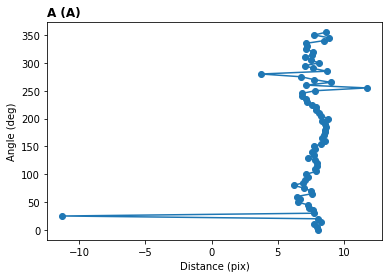

In [24]:
#plot them
plt.plot(gAposA,gAangA,'o-')
plt.title('A (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [25]:
gAB = prof.pos_in_maxs('B',fileMaxsA_True,centersA)
#position of B
gAposB = [i[1] for i in gAB]
#angles where A is seen
gAangB = [ang[i[0]] for i in gAB]

In [26]:
# to pixels
gApixB = [prof.pixels(origin_A, gAposB[i], gAangB[i]) for i,_ in enumerate(gAposB)] 
# save pixels to CASA crtf
prof.save_pixels('gPosB(A)',gApixB,symbol='+')

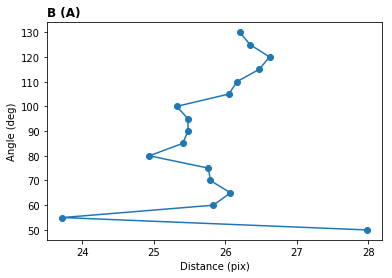

In [27]:
#plot them
plt.plot(gAposB,gAangB,'o-')
plt.title('B (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [31]:
gAS1 = prof.pos_in_maxs('S1',fileMaxsA_True,centersA)
#position of S1 (for sure)
gAposS1 = [i[1] for i in gAS1]
#angles where S1 is seen
gAangS1 = [ang[i[0]] for i in gAS1]

In [36]:
gAS1d = prof.pos_in_maxs('S1?',fileMaxsA_True,centersA)
#position of S1 (doubts)
gAposS1d = [i[1] for i in gAS1d]
#angles where S1 is seen
gAangS1d = [ang[i[0]] for i in gAS1d]

In [32]:
# to pixels
gApixS1 = [prof.pixels(origin_A, gAposS1[i], gAangS1[i]) for i,_ in enumerate(gAposS1)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS1(A)',gApixS1,symbol='+')

In [37]:
# to pixels
gApixS1d = [prof.pixels(origin_A, gAposS1d[i], gAangS1d[i]) for i,_ in enumerate(gAposS1d)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS1(A)-duda',gApixS1d,'magenta','+')

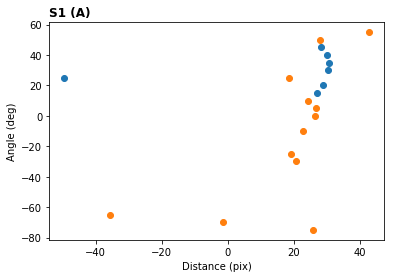

In [39]:
#plot them
gAnew_ang1 = prof.new_angle(ang,180)
gnAangS1 = [gAnew_ang1[i[0]] for i in gAS1]
gnAangS1d = [gAnew_ang1[i[0]] for i in gAS1d]
plt.plot(gAposS1,gnAangS1,'o')
plt.plot(gAposS1d,gnAangS1d,'o')
plt.title('S1 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [40]:
gAS2 = prof.pos_in_maxs('S2',fileMaxsA_True,centersA)
#position of S2 (for sure)
gAposS2 = [i[1] for i in gAS2]
#angles where S2 is seen
gAangS2 = [ang[i[0]] for i in gAS2]

In [41]:
gAS2d = prof.pos_in_maxs('S2?',fileMaxsA_True,centersA)
#position of S2 (doubts)
gAposS2d = [i[1] for i in gAS2d]
#angles where S2 is seen
gAangS2d = [ang[i[0]] for i in gAS2d]

In [42]:
# to pixels
gApixS2 = [prof.pixels(origin_A, gAposS2[i], gAangS2[i]) for i,_ in enumerate(gAposS2)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS2(A)',gApixS2,symbol='+')

In [43]:
# to pixels
gApixS2d = [prof.pixels(origin_A, gAposS2d[i], gAangS2d[i]) for i,_ in enumerate(gAposS2d)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS2(A)-duda',gApixS2d,'magenta','+')

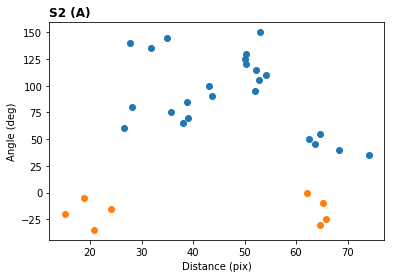

In [44]:
#plot them
gAnew_ang2 = prof.new_angle(ang,180)
gnAangS2 = [gAnew_ang2[i[0]] for i in gAS2]
gnAangS2d = [gAnew_ang2[i[0]] for i in gAS2d]
plt.plot(gAposS2,gnAangS2,'o')
plt.plot(gAposS2d,gnAangS2d,'o')
plt.title('S2 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()

In [47]:
gAS3 = prof.pos_in_maxs('S3',fileMaxsA_True,centersA)
#position of S3 (for sure)
gAposS3 = [i[1] for i in gAS3]
#angles where S3 is seen
gAangS3 = [ang[i[0]] for i in gAS3]

In [48]:
gAS3d = prof.pos_in_maxs('S3?',fileMaxsA_True,centersA)
#position of S3 (doubts)
gAposS3d = [i[1] for i in gAS3d]
#angles where S3 is seen
gAangS3d = [ang[i[0]] for i in gAS3d]

In [49]:
# to pixels
gApixS3 = [prof.pixels(origin_A, gAposS3[i], gAangS3[i]) for i,_ in enumerate(gAposS3)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS3(A)',gApixS3,symbol='+')

In [50]:
# to pixels
gApixS3d = [prof.pixels(origin_A, gAposS3d[i], gAangS3d[i]) for i,_ in enumerate(gAposS3d)] 
# save pixels to CASA crtf
prof.save_pixels('gPosS3(A)-duda',gApixS3d,'magenta','+')

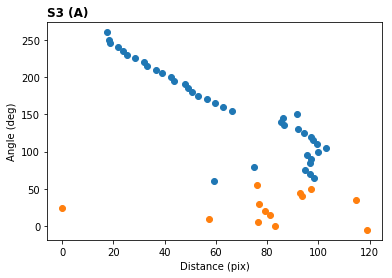

In [51]:
#plot them
gAnew_ang3 = prof.new_angle(ang,300)
gnAangS3 = [gAnew_ang3[i[0]] for i in gAS3]
gnAangS3d = [gAnew_ang3[i[0]] for i in gAS3d]
plt.plot(gAposS3,gnAangS3,'o')
plt.plot(gAposS3d,gnAangS3d,'o')
plt.title('S3 (A)', loc='left', fontsize=12, fontweight='bold')
plt.xlabel('Distance (pix)')
plt.ylabel('Angle (deg)')
plt.show()